# Stoke Prediction

### [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

 Developed by:  
 Beatriz Gonçalves – 115367​   
 Tiago Nazário – 89980

## Table of contents


1. [Introduction](#Introduction)

2. [Required Libraries](#Required-libraries)

3. [Data Pre-Processing (1)](#Data-Pre-Processing-(1))

4. [Data Visualization](#Data-Visualization)

5. [Data Pre-Processing (2)](#Data-Pre-Processing-(2))

5. [Supervised Learning](#Supervised-Learning)

6. [Conclusions](#Conclusions)

7. [References](#References)

## Introduction
[[ go back to the top ]](#Table-of-contents)    

This project concers a supervised learning problem. The main goal of this supervised learning problem is to learn how to classify examples in terms of the concept under analysis using different learning algorithms. We will use some machine learing models (different from what we used in the previous project) and some deep learning models. Then they should be compared using appropriate evaluation metrics. For this particular example we will study/implement the previous for [this](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) dataset.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **NumPy**: Provides a fast numerical array structure and helper functions.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **Plotly**: provides online graphing, analysis and statistics tools for individuals and collaboration, as well as scientific graphing libraries for python)
* **scikit-learn**: The essential Machine Learning package in Python.

In [1]:
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Train and test splitting
from sklearn.model_selection import train_test_split

# Using SMOTE
from imblearn.over_sampling import SMOTE

# For Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Importing SVM library
from sklearn.svm import SVC

# For Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# For Voting Classifier
from sklearn.ensemble import VotingClassifier

# Parameter tuning using gridsearchcv
from sklearn.model_selection import GridSearchCV 

# Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier

# For Recurrent Neural Network
from keras.layers import LSTM, Dense
from keras.models import Sequential

# For RNN GridSearch
from keras.wrappers.scikit_learn import KerasClassifier

# Performance Metrics: accuracy, precision, recall, F1-score, and other performance characteristics of different models
from sklearn import metrics

# Classification report
from sklearn.metrics import classification_report

#Confusion Matrix
from sklearn.metrics import confusion_matrix

# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score #AUC score

# K-fold Cross Validation
from sklearn.model_selection import StratifiedKFold



# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')


2023-01-21 02:36:01.675090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-21 02:36:02.015879: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-21 02:36:02.015943: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-21 02:36:02.776152: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Data Pre-Processing (1)

[[ go back to the top ]](#Table-of-contents)  

Our dataset contains contains information about patients who have had a stroke and those who have not, and it includes features such as age, sex, blood pressure, cholesterol levels, and others. The dataset contains about 12 attributes and 5110 observations. The goal is to use this information to predict whether a patient is at risk for a stroke. The dataset is provided by an user named "Federico Soriano" and it's labeled, it can be used for supervised learning problems.

Before any attempt of ML models implementation we need to do some data analysis and pre-processing, as well as visualization. These steps should always work together to achieve successful predictions after applying machine learning and deep learning models, since it allows a good understanding and exploration of our data.  
We first need to load the data. Then we may print some information about the dataset to get used to the way the information is organized and to know what our next step should be, such as statistics and possible missing and repeated values. The following topics indicate the description of each column in the dataset.

#### Column Description:
- **id**: unique identifier
- **gender**: "Male", "Female" or "Other"
- **age**: age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married**: "No" or "Yes"
- **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type**: "Rural" or "Urban"
- **avg_glucose_level**: average glucose level in blood
- **bmi**: body mass index
- **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- **stroke**: 1 if the patient had a stroke or 0 if not  
  
  
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
# Loading data 

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In this section we will just do a brief data cleaning before viewing our data. After the visualization, since it gives us a better insight into our data as well as a more statistical view of it, we proceed with transforming our data a bit more, to achieve good performance in our models.  

#### Select information

Our first step is to select information (feature selection). Since our goal is, within these features, to predict whether a patient is at risk for a stroke, we will select the information that we think is important and least important for this prediction. 
Analyzing the meaning of each column, listed above, we decided that the "id" column has no influence on the stroke prediction, this is just an idenfication feature that will not affect our prediction. Second, it is a feature that makes no sense to be normalized. In that case, it would end up influencing our models, having more weight in them than what we want.

In [3]:
# Drop id column
df = df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Null values

Counting the number of missing values (null values) in each column of "df" using the *isna()* method which returns a boolean mask of the same shape as the original dataframe indicating whether a value is missing or not.

The *sum()* method is used to count the number of True values in each column, which corresponds to the number of missing values.

In [4]:
# Number of null values (for each column and total)
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The output shows that there are 201 missing values in the "bmi" column. This means that there are 201 patients in the dataset that do not have a value for the "bmi" feature.

This missing data can have an impact on the model's performance and should be handled accordingly, for example, by removing the rows with missing data or imputing the missing values with a suitable value such as the mean or median of the column. This decision should be made based on the overall size of the dataset and the proportion of missing values.  
  
    
Losing 201 rows would end up greatly reducing our sample size. Therefore, we chose to replace the null values with the average of this column. 

In [5]:
df['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [6]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [7]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [8]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [9]:
# Check if we took care of all null values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Repeated Rows

We want to see if there are **duplicated rows** and, if so, delete only the second duplicate (keeping one of them).

In [10]:
# Drop repeated values

number_rows = df.shape[0]
df = df.drop_duplicates() # Keep first duplicate row 

print("Dropped ", (number_rows-df.shape[0]), " duplicate rows." )
print("Dataset has", df.shape[0], "unique rows.")

Dropped  0  duplicate rows.
Dataset has 5110 unique rows.


Our dataset does not have any duplicated rows.

#### Brief statistical summary of our dataset 

In [11]:
# Size of our dataset
df.shape 

(5110, 11)

We can see the outputs we got make perfect sense. We started with 5110 rows and 12 columns. However in feature selection we dropped the "id" column, so we ended up with **11** columns. Also, since we chose to replace the null values with the average of that column instead of dropping them, we are left with the same number of rows, **5110**.

In [12]:
df.describe(include = 'all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,NaN,NaN,NaN,28.893237,7.698018,10.3,23.8,28.4,32.8,97.6
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For **numeric data**, the result’s index will include **count**, **mean**, **std**, **min**, **max** as well as **lower**, **50** and **upper** **percentiles**. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For **object data** (e.g. strings), the result’s index will include **count**, **unique**, **top**, and **freq.** The top is the most common value. The freq is the most common value’s frequency.   

If *include='all'* is provided as an option, the result will include a union of attributes of each type. This is why we get null values when applying the indexes  **count**, **mean**, **min**, **max** as well as **lower**, **50** and **upper** **percentiles** to object data or when we apply  **count**, **unique**, **top**, and **freq.** to numeric data.

## Data Visualization

[[ go back to the top ]](#Table-of-contents)  

Before we do any other kind of transformation of our data, let's do the visualization.
In the previous section we analysed some of the data provided and made a few changes in order to easily have a better approach for our solution of the problem. Now, we will provide some different types of graphics and plots for a user friendly comprehension of the data to study as well as some statistical intepretation of our dataset.

#### Correlation
A correlation matrix is a symmetric matrix that shows the correlation coefficient between the different variables in the dataset. The correlation coefficient is a value between -1 and 1 that measures the strength and direction of the linear relationship between two variables. A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation.

In [13]:
df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


Let's represent this in a more user-friendly way.

In [14]:
# We get simmetric matrix/heatmap

fig = px.imshow(df.corr(),text_auto = True,height = 600,width = 600,color_continuous_scale=px.colors.sequential.Greens,
              aspect = 'auto',title = '<b>Pairwise correlation of columns')
fig.update_layout(title_x = 0.5)
fig.show() 

From this correlation matrix, the following observations can be made:

- The variable "**age**" has a relatively strong positive correlation with "**avg_glucose_level**" (0.238), "**bmi**" (0.326) and a moderate positive correlation with "**hypertension**" (0.276) and "**heart_disease**" (0.264);

- The variable "**hypertension**" has a moderate positive correlation with "**avg_glucose_level**" (0.174) and a weak positive correlation with "**heart_disease**" (0.108) and "**bmi**" (0.160);

- The variable "**heart_disease**" has a moderate positive correlation with "**avg_glucose_level**" (0.162) and a weak positive correlation with "**hypertension**" (0.108) and "**bmi**" (0.038);

- The variable "**avg_glucose_level**" has a moderate positive correlation with "**bmi**" (0.169) and weak positive correlation with "**stroke**" (0.132);

- The variable "**bmi**" has a weak positive correlation with "**stroke**" (0.038);

- The variable "**stroke**" has a moderate positive correlation with "**age**" (0.245) and "**heart_disease**" (0.135) and weak positive correlation with "**avg_glucose_level**" (0.132).


It's important to note that correlation does not imply causation, so these findings should not be interpreted as indicating that one variable causes another.  
  
The relatively strong positive correlation between "**age**" and "**avg_glucose_level**" could indicate that older people tend to have higher glucose levels. The moderate positive correlation between "**age**" and "**hypertension**" and "**heart_disease**" could indicate that these conditions are more common in older people. The moderate positive correlation between "**hypertension**" and "**avg_glucose_level**" could indicate that people with hypertension tend to have higher glucose levels. The weak positive correlation between "**heart_disease**" and "**avg_glucose_level**" could indicate that people with heart disease tend to have slightly higher glucose levels. The moderate positive correlation between "**stroke**" and "**age**" and "**heart_disease**" could indicate that these conditions are more common in people who have had a stroke.

#### Feature Distribution
Let's now look at the distribution of all our features (again, all non-strings), to see some of their behavior.

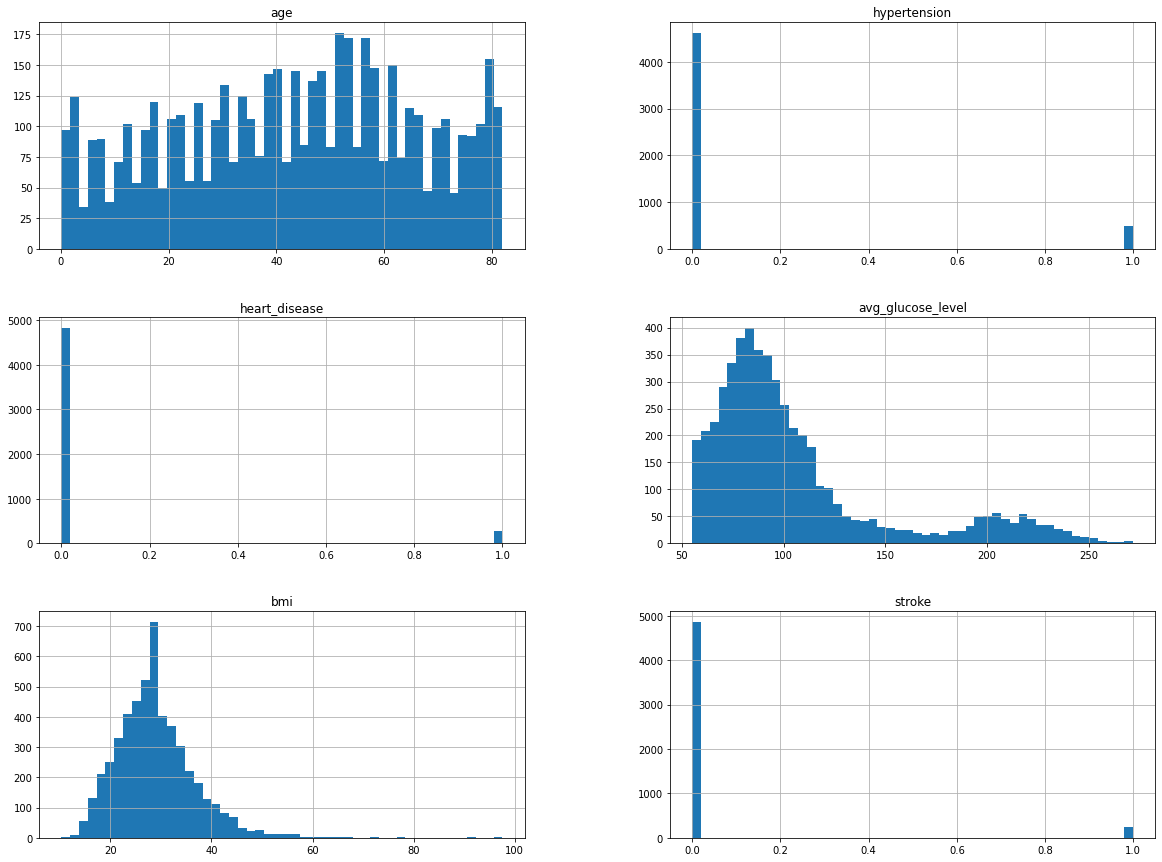

In [15]:
df.hist(bins = 50,figsize = (20,15))
plt.show()

Here we have a histogram for each of our non-string features: "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", and "stroke".

Here we can see how our dataset is balanced. For example, we can see that we have many more observations of users without "hypertension" than with "hypertension", as well as more users without "heart_disease" than with "heart_disease". Regarding the variable we want to predict, we can see that we have many more patients who have not suffered from "stroke" than users who have suffered "from stroke".

We can also create a boxplot of all the numerical columns in the dataset:

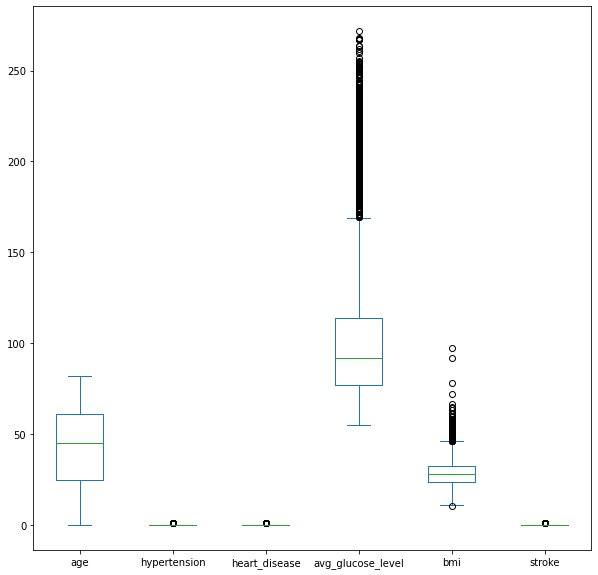

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(10,10) 
df.plot(kind='box')
plt.show()

This code shows the distribution of the numerical variables, with the box representing the interquartile range (IQR), the whiskers representing the minimum and maximum values (excluding outliers), and the dots representing outliers or extreme values. This plot can be used to identify outliers and check the distribution of the numerical variables in the dataset.

We can see a lot of dots for the "avg_glucose_level" feature. This way, lets explore a bit more this variable:

In [17]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [18]:
df[df['avg_glucose_level']>114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


We can see that we have about 1277 rows with values above the third quartile (75%), which is still a considerable portion of our data. So we will start by not removing it.

#### Age Vs. Avg_glucose_level 
We saw earlier, from the correlation matrix, an indication that older people tend to have higher glucose levels. Let's now look at the distribution of avg_glucose_level as a function of age.

In [19]:
px.scatter(df,x = 'age',y = 'avg_glucose_level',color = 'avg_glucose_level',
           color_continuous_scale = px.colors.sequential.Plasma,template = 'plotly_dark',
           title = '<b>Age Vs. Avg_glucose_level')

Now, through this distribution we can once again confirm the tendency for avg_glucose_level to increase as age also increases.

#### Age Vs. Hypertension Vs. Heart_disease

Another inference made was that the moderate positive correlation between "**age**" and "**hypertension**" and "**heart_disease**" could indicate that these conditions are more common in older people.

Text(0.5, 1.0, 'Age Vs. Hypertension Vs. Heart Disease')

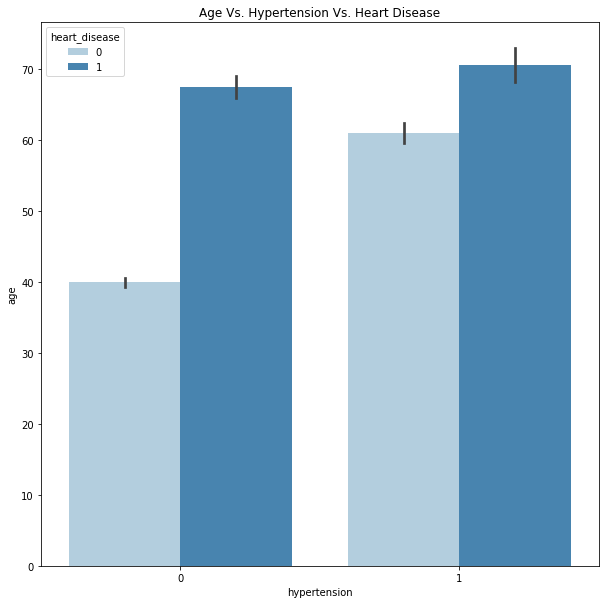

In [20]:
sns.barplot(x = 'hypertension',y = 'age',hue = 'heart_disease',data = df, palette = "Blues")
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Age Vs. Hypertension Vs. Heart Disease')

This bar plot shows the relationship between **hypertension**, **age**, and **heart disease**. The x-axis represents hypertension, the y-axis represents the mean of the age for each category of hypertension and heart disease. The hue represents the heart disease, and it's divided into two categories "Yes" and "No".

This bar plot can help us understand the relationship between hypertension, age, and heart disease. It can show us the mean age of patients who have hypertension, heart disease, and both, and helpt us understand if hypertension and heart disease are related to age or not.

We can confirm the previous inference that the average age is higher when "heart_disease" is equal to 1, that is, when the user has some heart disease.

#### Hypertension Vs. Avg_glucose_level

From the correlation matrix we supposed that the moderate positive correlation between "**hypertension**" and "**avg_glucose_level**" could indicate that people with hypertension tend to have higher glucose levels.

In [21]:
fig = px.violin(df, y='avg_glucose_level', x='hypertension', box=True, points='all')
fig.show()

A violin plot is a way to visualize the distribution of a continuous variable (in this case, "avg_ glucose_level") by a categorical variable (in this case, "hypertension"). It combines the best aspects of a boxplot and a kernel density estimate (KDE) plot.

In the violin plot, the violin shape is generated based on the kde (kernel density estimate) of the data, showing the density of the data points in the y axis.

It has a few key elements that can be used to interpret the distribution of the data:

- **The width of the violin**: The width of the violin represents the number of observations in that category. A wider violin indicates that there are more observations in that category;
- **The height of the violin**: The height of the violin represents the density of the observations. A taller violin indicates that the observations are more dense in that area;
- **Comparison between the violins**: We can compare the distribution of the data between the different categories (in this case hypertension) by looking at the shape, height and width of the violins.  
  
  
For example, in this case, we can see that the height of the violin is different for hypertension = 0 and hypertension = 1, this means that the density of the observations is different for these two groups. If we want to compare the distributions of "avg_glucose_level" in the two groups, we can look at the shape, height and width of the violins in each group. A taller and wider violin in one group indicates that the observations are more dense and there are more observations in that group.  

  
We can see that the height of the violin is taller for hypertension = 1 than hypertension = 0, this means that the density of the observations is higher for people with hypertension. Therefore, we can say that people with hypertension tend to have higher glucose levels.

However, it's important to note that this plot only shows the relationship between hypertension and average glucose level, it doesn't account for other factors that could influence this relationship.

#### Heart_disease Vs. Avg_glucose_level

The weak positive correlation between "**heart_disease**" and "**avg_glucose_level**" could indicate that people with heart disease tend to have slightly higher glucose levels.

In [22]:
fig = px.violin(df, y='avg_glucose_level', x='heart_disease', box=True, points='all')
fig.show()

Again, we are comparing a continuous variable with a categorical variable. This way, we will use again the violin plot. We can see that the comparison between the violins is very similar to the one we did before. The height of the violin is taller for heart_disease = 1 than heart_disease = 0, this means that the density of the observations is higher for people with heart_disease. Therefore, we can say that people with heart_disease tend to have higher glucose levels.

Again, it's important to note that this plot only shows the relationship between hypertension and average glucose level, it doesn't account for other factors that could influence this relationship.

#### Stroke Vs. Age Vs. Heart Disease

We also said that the moderate positive correlation between "**stroke**" and "**age**" and "**heart_disease**" could indicate that these conditions are more common in people who have had a stroke. Let's try to confirm this with another visualization.

Text(0.5, 1.0, 'Age Vs. Stroke Vs. Heart Disease')

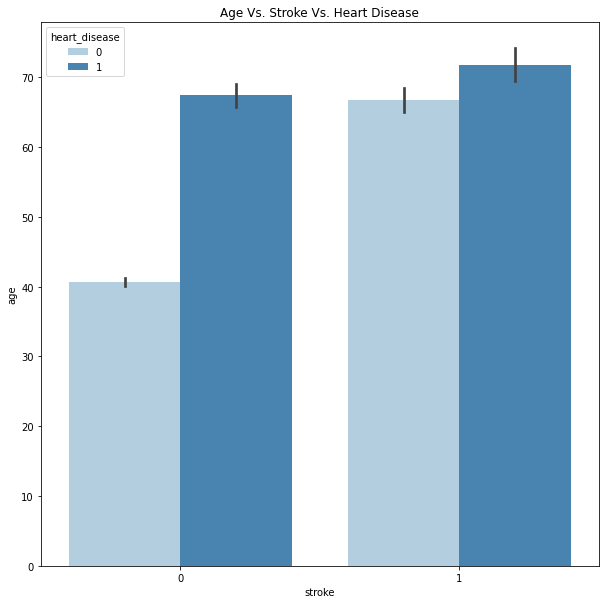

In [23]:
sns.barplot(x = 'stroke',y = 'age',hue = 'heart_disease',data = df, palette = "Blues")
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Age Vs. Stroke Vs. Heart Disease')

The x-axis represents the variable "**stroke**" and is divided into two categories: 0 and 1, representing whether the patient had a stroke or not. The y-axis represents the variable "**age**" and shows the average age of the patients for each category of "**stroke**" and "**heart_disease**". The hue parameter is set to "**heart_disease**" which will divide the bars into two different colors, representing whether the patient has heart disease or not. The palette parameter is set to "Blues" which will change the color of the bars to shades of blue.

This bar plot can help us understand the relationship between stroke, age, and heart disease. It can show us the average age of patients who had a stroke or not and whether they have heart disease or not. We can actually see a moderate positive correlation between these variables.

#### Work Type Vs. Stroke
We can also explore some different relation, for example, the number of strokes for each work type.

Text(0.5, 1.0, 'Work Type vs Stroke')

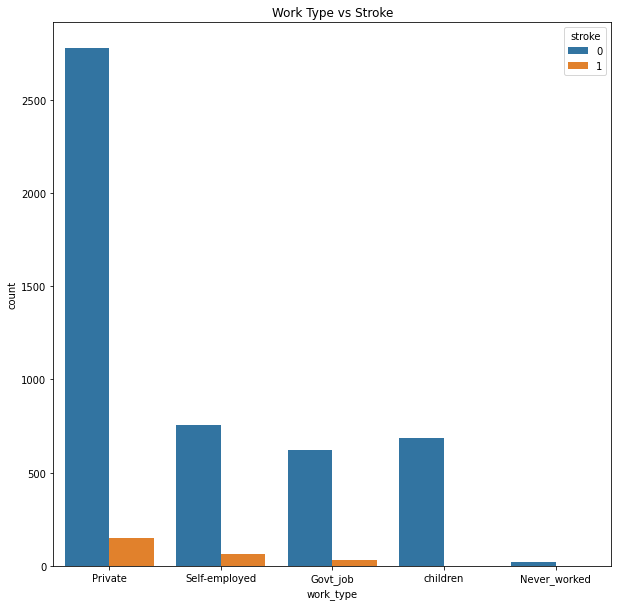

In [24]:
sns.countplot(data=df,x='work_type',hue='stroke')
plt.title('Work Type vs Stroke')


The x-axis represents the variable "work_type" and is divided into different categories such as "children", "Private", "Self-employed", "government" and "Never_worked". The y-axis represents the count of observations for each category of "**work_type**" and "**stroke**". The hue parameter is set to "stroke" which will divide the bars into two different colors, representing whether the patient had a stroke or not.

This count plot can help us understand the relationship between work_type and stroke. It can show us the count of patients who had a stroke or not for each work_type and understand if certain work_type are more prone to stroke or not. In this case, we can see that "Private" work type and "Self-employed" work type are more prone to have a stroke than the other work type. But they are also the ones that have more observations. 

If we want to compare the proportions of stroke cases among different work types, it would be better to normalize the data by dividing the count of observations in each category by the total number of observations in that category. This will give us the proportion of observations in each category, which can be useful for making meaningful comparisons between categories:

Text(0.5, 1.0, 'Work Type vs Stroke (Proportion)')

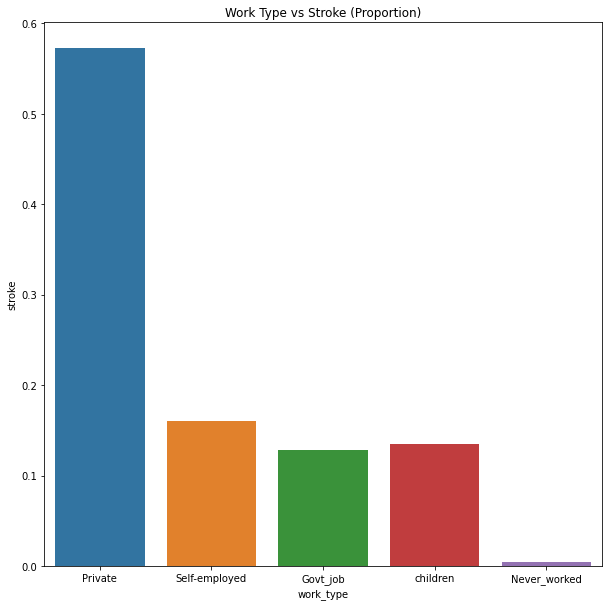

In [25]:
sns.barplot(data=df,x='work_type',y='stroke', estimator=lambda x: len(x) / len(df))  
plt.title('Work Type vs Stroke (Proportion)')


This shows the relationship between the categorical variable "**work_type**" and the categorical variable "**stroke**" in terms of proportion.

The x-axis represents the variable "**work_type**" and is divided into different categories such as "children", "Private", "Self-employed", "government" and "Never_worked". The y-axis represents the proportion of observations for each category of "work_type" and "stroke". The estimator parameter is set to a lambda function that normalizes the data by dividing the count of observations in each category by the total number of observations in the dataset.

This bar plot can help us understand the relationship between work_type and stroke in terms of proportion. It can show us the proportion of patients who had a stroke or not for each work_type. It can help you understand if certain work_types are more prone to stroke or not. We can still see, with the normalized data, that the "Private" and "Self-employed" work types are the ones with the highest proportion of strokes.

#### Residence Type Vs. Stroke
Let's explore the number of strokes for each residence type.

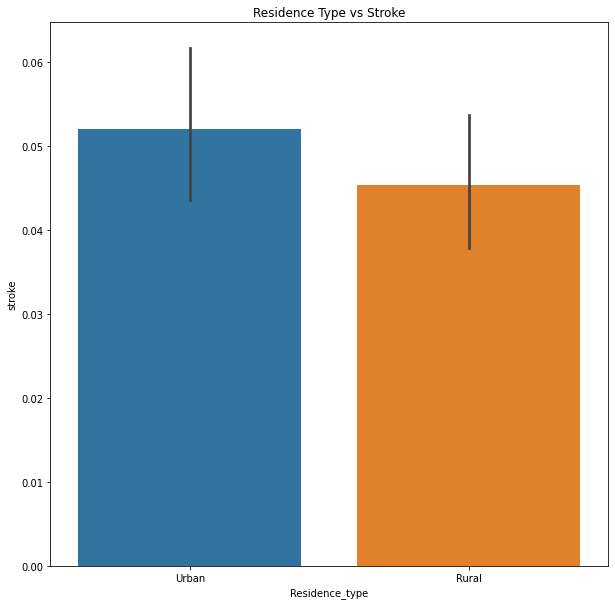

In [26]:
sns.barplot(x=df['Residence_type'],y=df['stroke'])
plt.title('Residence Type vs Stroke')
plt.rcParams['figure.figsize']=(10,10)

The x-axis represents the variable "**Residence_type**" and is divided into different categories such as "Rural", "Urban" . The y-axis represents the mean of the observations for each category of *Residence_type" and "**stroke**" .

This bar plot can help us understand the relationship between Residence_type and stroke. It can show us the mean of patients who had a stroke or not for each Residence_type, and help us understand if certain Residence_types are more prone to stroke or not.

However, as before, it is important to consider normalizing the data when we're comparing different categories of a variable, especially when the number of observations in each category is not the same. Normalizing the data will help us compare the proportion of observations in each category rather than the raw count of observations.

In this case, you can use same estimater as we did in the previous plot:

Text(0.5, 1.0, 'Residence Type vs Stroke (Proportion)')

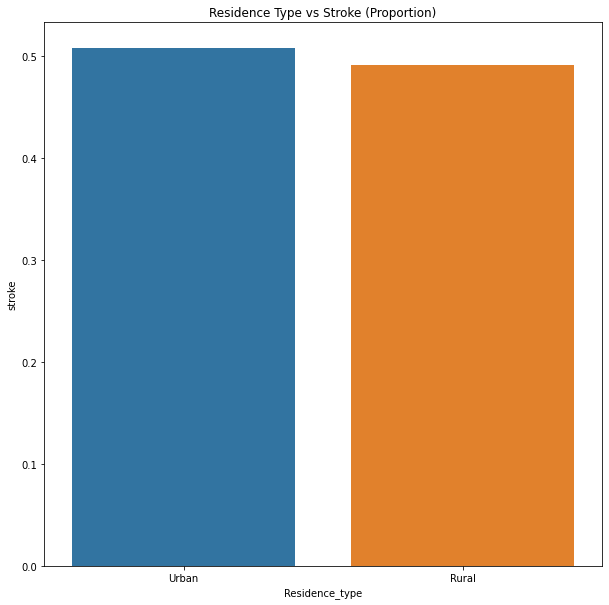

In [27]:
sns.barplot(x='Residence_type',y='stroke', data=df, estimator=lambda x: len(x) / len(df))
plt.title('Residence Type vs Stroke (Proportion)')


This will give us the proportion of stroke cases among different Residence types. 
Unlike what we saw in the plot where the data was not normalized, we can see that the proportion of strokes for the different residence types is very similar. 

#### Married Vs. Stroke
Let's explore the number of strokes for married and unmarried people, since this also seems to be a risk factor.

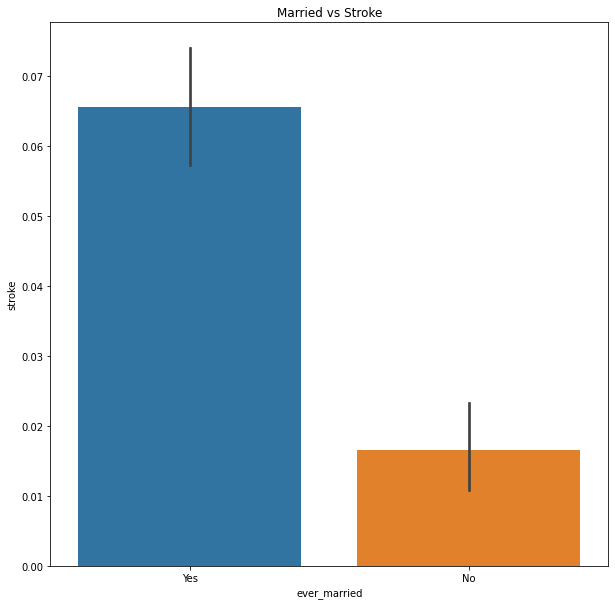

In [28]:
sns.barplot(x=df['ever_married'],y=df['stroke'])
plt.title('Married vs Stroke')
plt.rcParams['figure.figsize']=(10,10)

The x-axis represents the variable "**ever_married**" and is divided into two categories "Yes" and "No". The y-axis represents the mean of the observations for each category of "ever_married" and "**stroke**".

This bar plot can help us understand the relationship between ever_married and stroke. It can show you the mean of patients who had a stroke or not for each category of ever_married, and understand if being married is actually a risk factor for stroke or not.

As mentioned before it's important to normalize the data to compare the proportion of observations in each category rather than the raw count of observations. We will use the same estimator parameter as before:

<AxesSubplot: xlabel='ever_married', ylabel='stroke'>

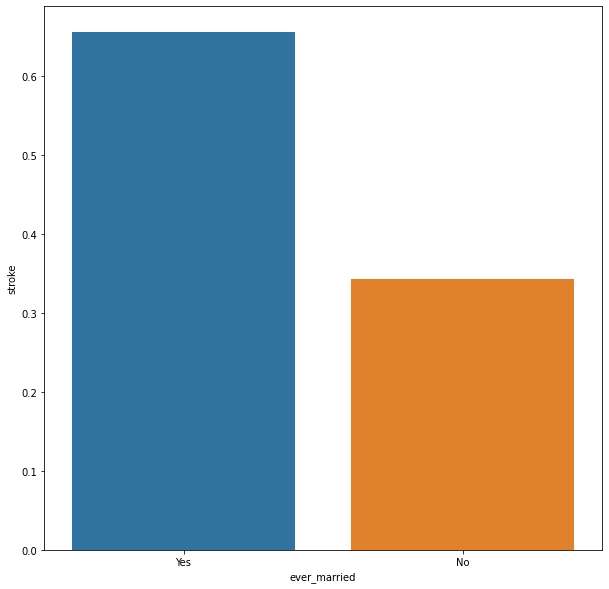

In [29]:
sns.barplot(x='ever_married',y='stroke', data=df, estimator=lambda x: len(x) / len(df))

From the bar plot, we can see that the proportion of stroke cases among the "Yes" category is higher than the proportion of stroke cases among the "No" category. However, it's important to keep in mind that the proportion of stroke cases alone doesn't necessarily mean that being married is a risk factor for stroke. There might be other factors that are associated with both being not married and having a stroke, such as age, lifestyle, etc.

It's also important to consider the sample size, it's possible that the dataset we're working with is not representative and has more observations in the "Yes" category than the "No" category, that could be the reason why the bar is twice the size:

In [30]:
# We can see that the dataset has more observations in the "Yes" than the "No" category
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

It's important to take into account the different variables that are associated with stroke, such as hypertension, heart disease, age, lifestyle factors, etc. and how they interact with each other.

#### Gender Vs. Stroke
Let's explore the number of strokes by gender.

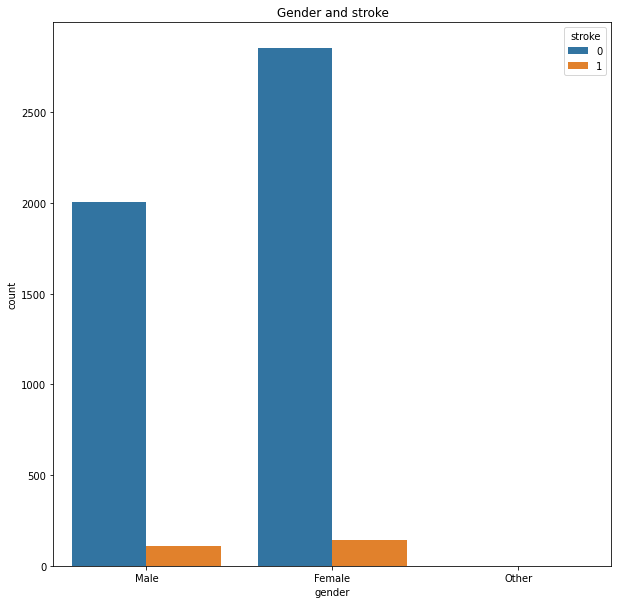

In [31]:
sns.countplot(x=df['gender'],hue=df['stroke'])
plt.title('Gender and stroke')
plt.rcParams['figure.figsize']=(20,35)

This count plot shows the relationship between **gender** and **stroke**. The x-axis represents gender and the y-axis represents the number of observations for each category of gender and stroke. The hue represents the stroke, and it's divided into two categories "Yes" and "No".

This count plot can help us understand the relationship between gender and stroke. It can show us the number of patients of each gender who have had a stroke or not, and help us understand if there is a relationship between gender and stroke or not.

It's important to keep in mind that the sample size for each category is important, it could be that one category has more observations than the other and that could be the reason why one category is bigger than the other. 

Again, it would be a good idea to normalize the data in this case. Count plots are useful for showing the frequency of observations in each category, but the raw count can be misleading if the sample size is not equal for each category. By normalizing the data, we can compare the proportion of observations in each category, rather than the raw count.

For example, in this case, we can calculate the proportion of stroke cases among men and women, and compare the proportions rather than the raw count.

Again, we will use the same estimator parameter as before:

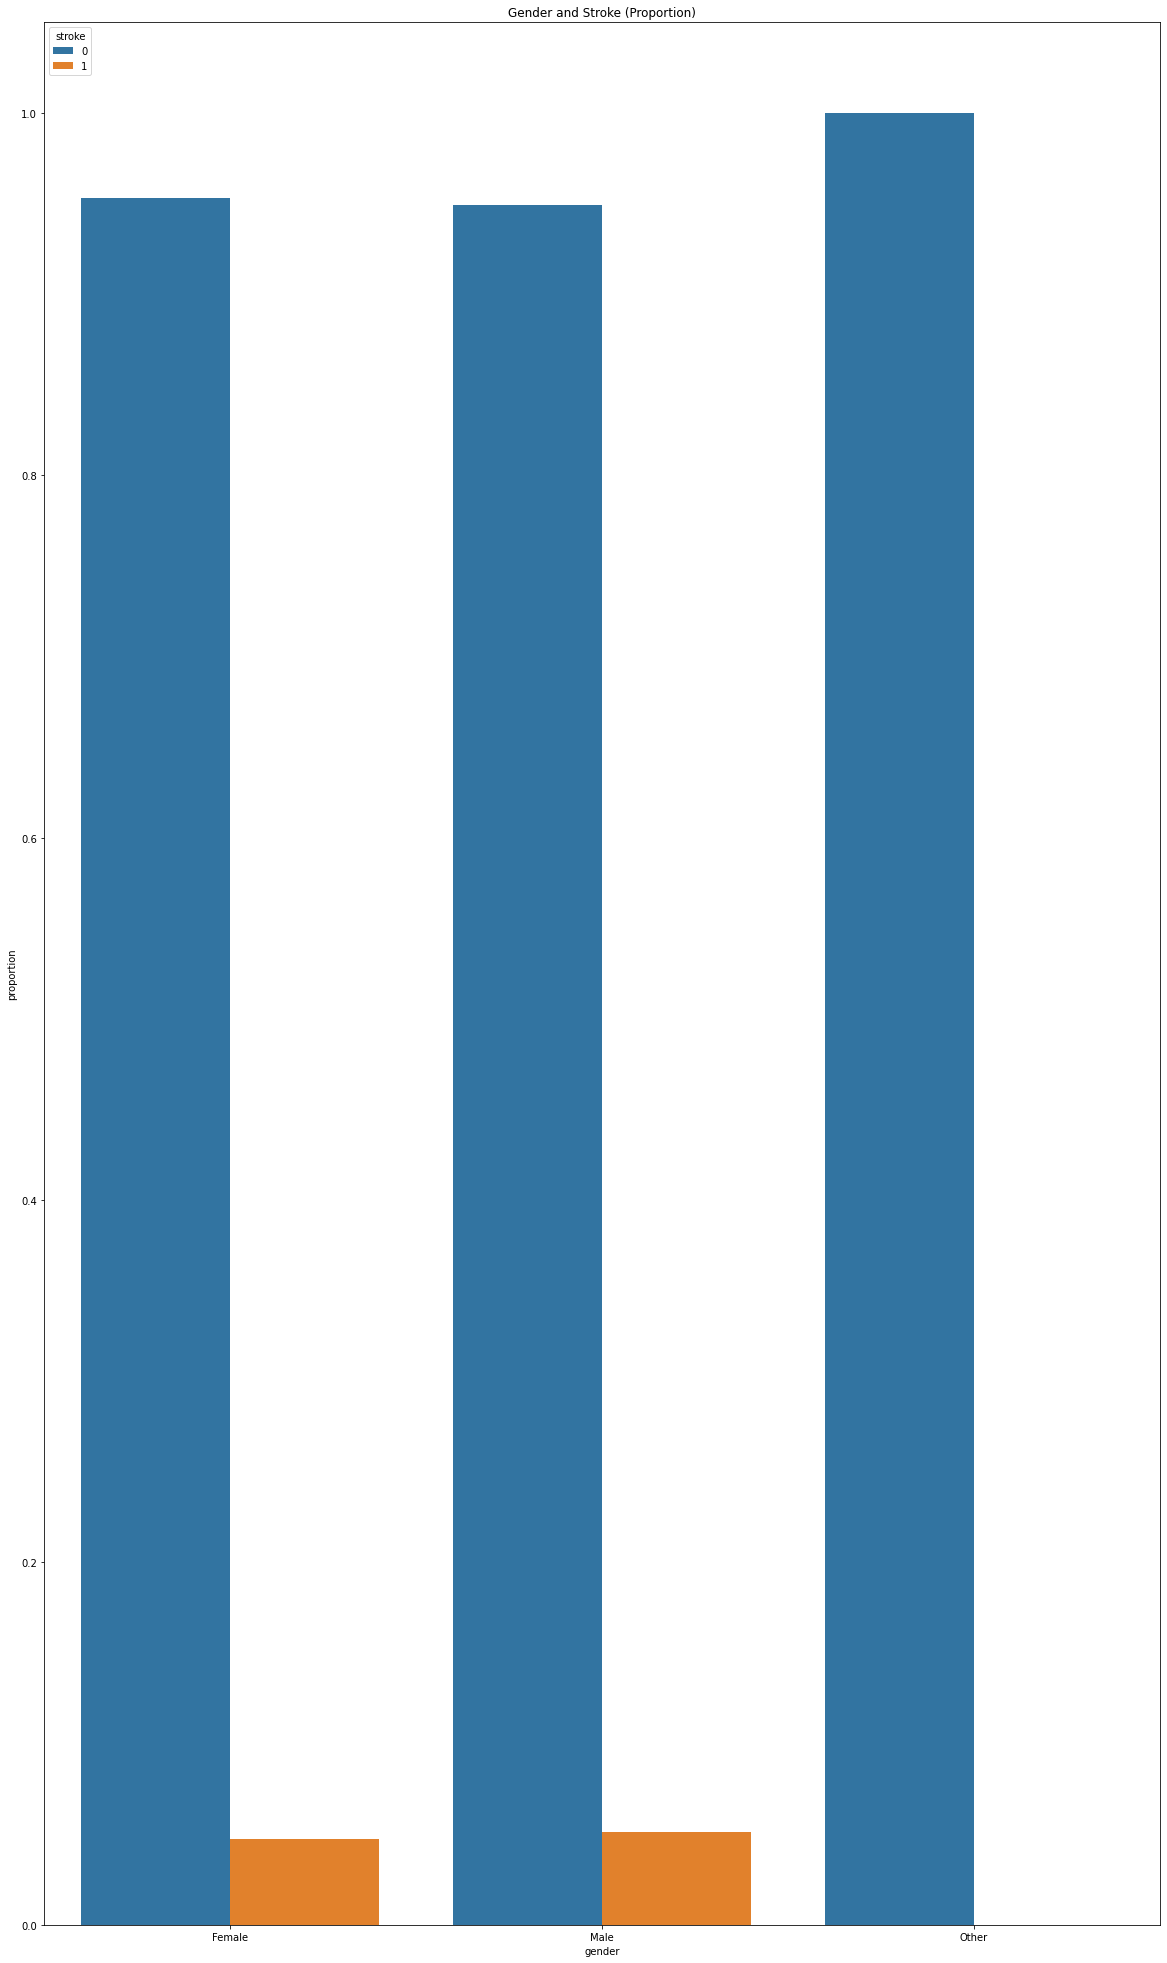

In [32]:
df_stroke = df.groupby(['gender','stroke'])['stroke'].count().reset_index(name='counts') #grouping the original dataframe df by gender and stroke counting the number of occurrences for each combination
df_stroke['proportion'] = df_stroke.groupby('gender')['counts'].apply(lambda x: x/x.sum()) # adds a column 'proportion' that is the ratio of the count for that combination to the total count for that gender
sns.barplot(x='gender',y='proportion',hue='stroke',data=df_stroke) 
plt.title('Gender and Stroke (Proportion)')
plt.rcParams['figure.figsize'] = (6, 4)


From this graph, it can be seen that the proportion of stroke occurrences is similar in females and males. The proportion of cases where stroke does not occur is higher in both males and females as compared to the cases where stroke does occur.

#### Hypertension Vs. Stroke
Let's explore the number of strokes related to the occurence of hypertension.

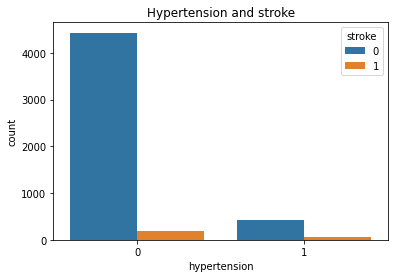

In [33]:
sns.countplot(x=df['hypertension'],hue=df['stroke'])
plt.title('Hypertension and stroke')
plt.rcParams['figure.figsize'] = (10,10)

This graph shows the count of occurrences of **hypertension** and **stroke** for each category (0 or 1) in the dataset. It can be seen that the majority of individuals with hypertension did not have a stroke.

One more time, it would be a good idea to normalize the data in order to better compare the proportions of stroke occurrences between the two groups. This can be done by calculating the proportion of stroke occurrences for each group (hypertension=0 and hypertension=1) relative to the total number of observations in that group. This way, we can directly compare the proportion of stroke occurrences between the two groups and make more accurate conclusions:

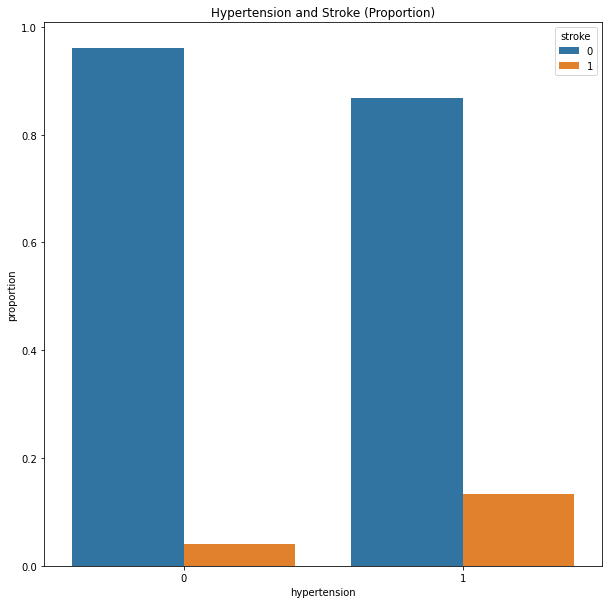

In [34]:
# Group the dataframe by hypertension and stroke
df_hypertension = df.groupby(['hypertension','stroke'])['stroke'].count().reset_index(name='counts')

# Add a column for the total number of observations in each group
df_hypertension['total'] = df_hypertension.groupby('hypertension')['counts'].transform('sum')

# Calculate the proportion of stroke occurrences for each group
df_hypertension['proportion'] = df_hypertension['counts'] / df_hypertension['total']

# Plot the proportion of stroke occurrences for each group
sns.barplot(x='hypertension', y='proportion', hue='stroke', data=df_hypertension)
plt.title('Hypertension and Stroke (Proportion)')
plt.rcParams['figure.figsize'] = (6, 4)

Now we can see that a larger number of individuals who did have a stroke, also had hypertension compared to those who did not have a stroke. This suggests that hypertension may be a risk factor for stroke.

#### Smoking Status

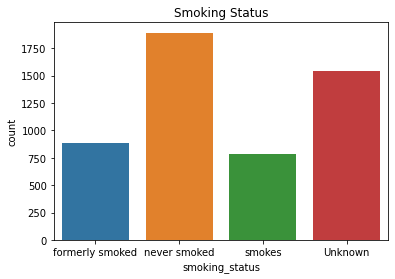

In [35]:
sns.countplot(data=df,x='smoking_status')
plt.title('Smoking Status')
plt.rcParams['figure.figsize'] = (10,10)

This count plot will display the number of occurrences for each category in the '**smoking_status**' column. This can be useful to see the distribution of smoking status among the observations in the data. We can see that we more non-smokers in our data, for example.

#### Stroke Status

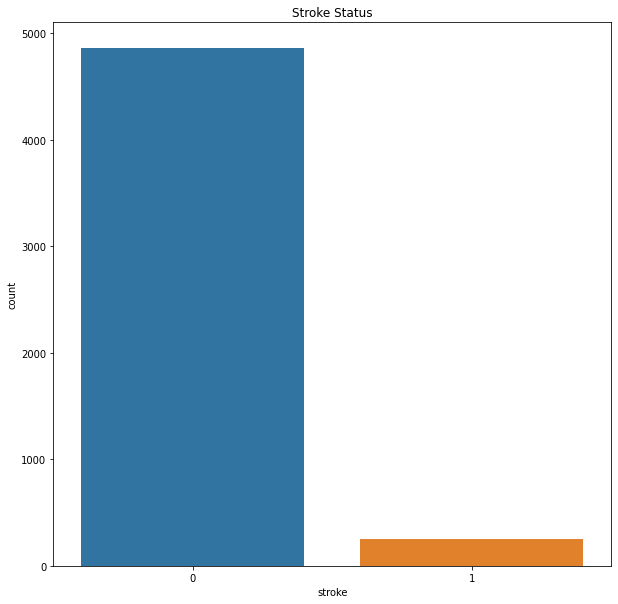

In [36]:
sns.countplot(x = df['stroke'])
plt.title('Stroke Status')
plt.rcParams['figure.figsize'] = (5,5)

We can see that our dataset is quite unbalanced, having a much larger number of non-occurrences of strokes.

After this visualization process we already have a much better understanding of the data we are dealing with, as well as the relationships of our variables.  We are then able to apply our supervised learning models. Before doing so, we just have to make a brief adjustment to our data in order to finish our data pre-processing.

## Data Pre-Processing (2)

[[ go back to the top ]](#Table-of-contents) 

Once we have finished the visual and statistical exploration of our data, we will finish the transformation of our data so that we have it in its best form to be implemented in machine learning and deep learning models. 


In [37]:
# Calling our dataset
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [38]:
# Count gender values
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

We have only one sample of the "gender" feature classified as "other". This one will not have any contribution to our models, so we will drop this row. 

In [39]:
df.drop(df[df.gender == 'Other'].index, inplace=True)

#Check if we effectively dropped the row
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

We have ages that are not integer (whole) numbers, and thus do not have an intuitive interpretation. Therefore, the solution we chose was to round the age to the nearest integer number, so the age is just expressed in years. 

In [40]:
#Check if we effectively dropped the row
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [41]:
# Round to the closest integer number
df['age'] = df['age'].round()

# Check if the values are rounded
df['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name: age, Length: 83, dtype: int64

We also have some columns with strings, such as "**gender**", "**ever_married**", "**residence_type**" and "**smoking_status**". Let's start by encoding "gender" and "ever_married", since they are classified as "male", "female" and "yes", "no", respectively. 

In [42]:
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['ever_married'] = df['ever_married'].map({'Yes':1,'No':0})

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,Private,Urban,83.75,28.893237,never smoked,0
5106,1,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


Regarding the "**smoking_status**" feature, we have 4 classification possibilities "formerly smoked", "never smoked", "smokes" or "Unknown".
We will group "formerly smoked" and "smokes" into the same category, to simplify our analysis. This will reduce the number of categories in the smoking status column, making it easier to analyze and interpret the data.  
  
Regarding the "Unknown" category, one option could be to remove these rows with, but we don't want to lose any more information from our dataset. So, another option could be to replace the unknown values with thee mode (most common value) of the smoking_status column. It is not clear what the true value for these unknown observations is, this is one assumption that we will make.

In [43]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [44]:
# We can see that the mode is "never smoked"
df['smoking_status'].describe()

count             5109
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

This way, we will join the "**formerly smoked**" and "**smokes**" classes and classify them as **1**, and join the "**never smoked**" and "**Unknown**" classes and classify them as **0**.

In [45]:
df['smoking_status'] = df['smoking_status'].replace(['formerly smoked', 'smokes'], 1)
df['smoking_status'] = df['smoking_status'].replace(['never smoked', 'Unknown'], 0)

# Check if we implemented the replacement right
df['smoking_status'].value_counts()

0    3436
1    1673
Name: smoking_status, dtype: int64

Now, regarding the "**Residence_type**" feature we can just classify it as zeros and ones, because it only has 2 possible classifications "Urban" and "Rural". This way, we will classify "**Urban**" as **1**, and "**Rural**" as **0**. 

In [46]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [47]:
df['Residence_type'] = df['Residence_type'].map({'Urban':1, 'Rural':0})

#Check if we implemented the mapping right
df['Residence_type'].value_counts()

1    2596
0    2513
Name: Residence_type, dtype: int64

Regarding the "**work_type**" feature, we have more than two classes. We have the classes: "**children**", "**Govt_jov**", "**Never_worked**", "**Private**" or "**Self-employed**". We then have to figure out how to encode this feature.
It would not make sense to use "*.LabelEncoder()*" .  It is a class in the scikit-learn library in Python that is used to convert categorical data, or data that can be divided into categories, into numerical data. It assigns a unique integer value to each category. However, we would end up assigning codes to the "work_type" classes randomly, and we would not be able to understand and identify what each code corresponds to. Since we don't want to do this "blindly", we will encode this differently. 

For each of these classes we will create a column, that is, we will add 5 more columns to our dataset: "children", "Govt_jov", "Never_worked", "Private" and "Self-employed". If the sample belongs to the "children" class, for example, then we will return 1 in this column for "childern" and 0 in the remaining 4, and so on.  Finally, we drop the orginal "work-type" column.


In [48]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Now, we will not have a work_type classified as "children", since we used this classification for age, which is much more intuitive for the user. 

In [49]:
# Creating the new columns
df["children"] = 0
df["Govt_job"] = 0
df["Never_worked"] = 0
df["Private"] = 0
df["Self_employed"] = 0

# Populating the new columns based on the values in "work_type" column
df.loc[df["work_type"] == "children", "children"] = 1
df.loc[df["work_type"] == "Govt_job", "Govt_job"] = 1
df.loc[df["work_type"] == "Never_worked", "Never_worked"] = 1
df.loc[df["work_type"] == "Private", "Private"] = 1
df.loc[df["work_type"] == "Self-employed", "Self_employed"] = 1

# Droping the orginal column
df.drop("work_type", axis=1, inplace=True)

In [50]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,children,Govt_job,Never_worked,Private,Self_employed
0,0,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,0,1,0
1,1,61.0,0,0,1,0,202.21,28.893237,0,1,0,0,0,0,1
2,0,80.0,0,1,1,0,105.92,32.500000,0,1,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,1,0
4,1,79.0,1,0,1,0,174.12,24.000000,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.893237,0,0,0,0,0,1,0
5106,1,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,0,0,1
5107,1,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,0,0,1
5108,0,51.0,0,0,1,0,166.29,25.600000,1,0,0,0,0,1,0


In [51]:
# Check value counts of each new column
print(df['children'].value_counts())
print(df['Govt_job'].value_counts())
print(df['Never_worked'].value_counts())
print(df['Private'].value_counts())
print(df['Self_employed'].value_counts())


0    4422
1     687
Name: children, dtype: int64
0    4452
1     657
Name: Govt_job, dtype: int64
0    5087
1      22
Name: Never_worked, dtype: int64
1    2924
0    2185
Name: Private, dtype: int64
0    4290
1     819
Name: Self_employed, dtype: int64


As we saw in our previous visualizations, regarding the stroke variable (the one we want to predict), that our dataset is extremely **unbalanced**:

In [52]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

So, we have 4860 samples with stroke = 0 and only 249 with stroke = 1. Trying to create a sub-dataset with the same number of stroke and non-stroke cases is not possible, since we would loose a lot of information and get a much smaller dataset to later apple in machine learning and deep learing algorithms. One solution for this problem, that we will aplly later, is **SMOTE (Synthetic Minority Oversampling Technique)**. It is a technique used to balance class distribution in a dataset. It is used to oversample the minority class by creating synthetic samples. The algorithm works by finding the k nearest neighbors for each minority class sample, and then generating new samples by randomly selecting one of the k nearest neighbors and taking the difference between that sample and the original sample, multiplying it by a random number between 0 and 1, and then adding it to the original sample. This new sample is then added to the dataset, thereby increasing the number of minority class samples. The goal of SMOTE is to balance the class distribution by oversampling the minority class, which can help improve the performance of machine learning models on imbalanced datasets.

Advantages of SMOTE include:

- It can effectively balance class distribution by oversampling the minority class;
- It can reduce the impact of the class imbalance problem on the model's performance;
- It can help improve the model's ability to generalize to new minority samples.

Disadvantages of SMOTE include:

- It can lead to overfitting if the synthetic samples are too similar to the original minority samples;
- It can be computationally expensive if the size of the dataset is large;
- It can lead to a loss of diversity in the minority class if the synthetic samples are not diverse enough.

#### Data normalization

Since our features are measured at different scales we have to **normalize** our data. This is because scales with higher numbers end up having more importance in our models, while smaller numbers end up having less, and this will end up misleading our models. 
Columns that are already classified as 0 and 1 make no sense to be normalized as: "gender",	"hypertension",	"heart_disease", "ever_married", "Residence_type", "smoking_status", "stroke", "children", "Govt_job", "Never_worked", "Private" and "Self_employed" columns. 

We will then **normalize** the features: '**age**', '**avg_glucose_level**' and	'**bmi**'. This is done using the max-min normalization technique, which scales the values between 0 and 1. 

In [53]:
# Data Normalization

df_max_scaled = df[['age','avg_glucose_level','bmi']]

# Apply normalization techniques

for column in df_max_scaled.columns:

    df_max_scaled[column] = df_max_scaled[column]/df_max_scaled[column].max()

In [54]:
# drop the original columns
df.drop(['age', 'avg_glucose_level', 'bmi'], axis=1, inplace=True)

# insert the normalized columns
df.insert(1, 'age_norm', df_max_scaled['age'])
df.insert(7, 'glucose_norm', df_max_scaled['avg_glucose_level'])
df.insert(8, 'bmi_norm', df_max_scaled['bmi'])

df

,gender,age_norm,hypertension,heart_disease,ever_married,Residence_type,smoking_status,glucose_norm,bmi_norm,stroke,children,Govt_job,Never_worked,Private,Self_employed
0,0,0.817073,0,1,1,1,1,0.841577,0.375000,1,0,0,0,1,0
1,1,0.743902,0,0,1,0,0,0.744130,0.296037,1,0,0,0,0,1
2,0,0.975610,0,1,1,0,0,0.389784,0.332992,1,0,0,0,1,0
3,1,0.597561,0,0,1,1,1,0.630124,0.352459,1,0,0,0,1,0
4,1,0.963415,1,0,1,0,0,0.640760,0.245902,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975610,1,0,1,1,0,0.308199,0.296037,0,0,0,0,1,0
5106,1,0.987805,0,0,1,1,0,0.460735,0.409836,0,0,0,0,0,1
5107,1,0.426829,0,0,1,0,0,0.305402,0.313525,0,0,0,0,0,1
5108,0,0.621951,0,0,1,0,1,0.611945,0.262295,0,0,0,0,1,0


Now, we have our normalized dataset, ready to be applied to the models we want to implement.

#### Select what we want to predict

As we have already said, we intend to **predict** the "**stroke**" column. In this case, we don't want to train the "**stroke**" column, we want that column to be our predictable one.  
This way, we are going to  **drop and save** the column we want to predict: "**stroke**". 

In [55]:
# Dropping and saving stoke column

X = df.drop('stroke', 1) 
y = df['stroke']

#### Split our data

We're going to set aside **20%** for **test** data. This is to ensure that we don't commit any 'data snooping' bias. 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

The code above is splitting the feature data (X) and target data (y) into training and testing sets. The train_test_split function is from the scikit-learn library and is used to split the data into two sets. The test_size argument is set to 0.2, meaning that 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state argument is set to 42. This controls the shuffling applied to the data before applying the split, i.e., is used to randomly split data into training and test set.

Now let's see how the **stroke** for y_test and y_train looks like after splitting.

In [57]:
y_train.value_counts(dropna=False,normalize=True)*100

0    95.424517
1     4.575483
Name: stroke, dtype: float64

In [58]:
y_test.value_counts(dropna=False,normalize=True)*100

0    93.933464
1     6.066536
Name: stroke, dtype: float64

Again, we can see that the data is very unbalanced for *y_train* and *y_test*. So, now, lets **apply the SMOTE** (as we explained before).

In [59]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [60]:
# See how y_train looks after splitting
y_train_resampled.value_counts(dropna=False,normalize=True)*100

0    50.0
1    50.0
Name: stroke, dtype: float64

In [61]:
# We got a dataset with 7800 rows and 14 columns
X_train_resampled

,gender,age_norm,hypertension,heart_disease,ever_married,Residence_type,smoking_status,glucose_norm,bmi_norm,children,Govt_job,Never_worked,Private,Self_employed
0,0,0.963415,0,0,1,0,1,0.414514,0.292008,0,0,0,0,1
1,1,0.756098,0,0,1,1,0,0.325017,0.371926,0,0,0,1,0
2,1,0.256098,0,0,0,0,0,0.219033,0.345287,0,0,0,1,0
3,0,0.378049,0,0,1,1,1,0.241775,0.311475,0,1,0,0,0
4,1,0.378049,0,0,0,0,0,0.219438,0.203893,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,0,0.987805,0,0,1,0,0,0.349746,0.332309,0,0,0,0,1
7796,1,0.986354,1,0,1,0,0,0.294312,0.255538,0,0,0,0,1
7797,1,0.940750,0,0,1,1,0,0.381710,0.314240,0,0,0,1,0
7798,1,0.914114,0,0,1,1,0,0.255996,0.230227,0,0,0,1,0


SMOTE can be used on normalized data, as it does not change the underlying distribution of the data.   

It is also important to note that, it is generally recommended to only use SMOTE on the training set, and not the test set, so that the model is not trained to expect the oversampled data during evaluation.

#### Brief description of the applied models

For our solution we implement 2 machine learning algorithms, one that we used in the first project and a new one:
* **Decision Tree Classifier**: creates the classification model by building a decision tree (used in the first project); 
* **Support Vector Machines (SVMs)**: a type of supervised learning algorithm that uses a boundary, called a hyperplane, to classify data points into different categories by maximizing the margin between the closest data points of different classes (no used in the first project).

We will also implement 2 deep learning algorithms:
* **Multilayer Perceptrons Classifier (MLP)**: is a type of artificial neural network that is composed of multiple layers of interconnected nodes, also known as perceptrons, to classify input data;
* **Recurrent Neural Networks (RNN)**: uses sequential information to process and classify data, by allowing for feedback connections in the network and maintaining a hidden state.

### Applying the machine learning (ML) models 

Let's divide the application of our ML models into two parts. In the first part, we apply the ML models using the default values, that is, without setting the hyper-parameters. In the second part we choose the best hyper-parameters for our models and see if there were any improvements in their performance.

### 1. Using default values  

In this first part of our algorithm implementation we will use the **default values** of each algorithm classifier. Then we **compare** the results with the original "stroke" column.

### Decision Tree Classifier

In [62]:
# Calling the algorithm
decision_tree_classifier = DecisionTreeClassifier() 

# Training the algorithm with the training dataset
decision_tree_classifier.fit(X_train_resampled, y_train_resampled) 

'''Predictions and accuracy for training set'''
#  Predictions applied to the train dataset
dtc_all_predictions_train = decision_tree_classifier.predict(X_train_resampled)

# Accuracy (comparing predictions with y_train)
dtc_score_train = metrics.accuracy_score(y_train_resampled, dtc_all_predictions_train)

# Print the score/accuracy
print(f"\nAccuracy for training set:\n {dtc_score_train}\n")


'''Predictions and accuracy for test set'''
#  Predictions applied to the test dataset
dtc_all_predictions_test = decision_tree_classifier.predict(X_test) 

# Accuracy (comparing predictions with y_test)
dtc_score_test = metrics.accuracy_score(y_test, dtc_all_predictions_test)

# Print the score/accuracy
print(f"\nAccuracy for testing set:\n {dtc_score_test}\n")


Accuracy for training set:
 1.0


Accuracy for testing set:
 0.8170254403131115



Clearly, analyzing the accuracies we have obtained, we are facing a case of **overfitting** for this model. This happens when the model completely fits the training data but fails to generalize the testing unseen data. Overfit condition arises when the model memorizes the noise of the training data and fails to capture important patterns. It is important to check the accuracy on the test set or use cross validation techniques to get a better idea of the model's performance on unseen data.  
There are various techniques to prevent the decision tree model from overfitting, we will use "**pruning**".  
By **default**, the decision tree model is allowed to grow to its **full depth**. Pruning refers to a technique to **remove the parts of the decision tree** to prevent growing to its full depth. By tuning the hyperparameters of the decision tree model one can prune the trees and prevent them from overfitting.
There are two types of pruning **Pre-pruning** and **Post-pruning**. 
Pre-pruning is what we will do in the second part that we talked about above, we will clarify this one in more detail later.  

So, here, we will apply **post-pruning**. We will come back to this shortly ater analysing the **classification report** for the test set, **confusion matrix** and **roc curve**. 

In [63]:
# Classification report for the test set

dtc_all_report_test = classification_report(y_test, dtc_all_predictions_test, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, dtc_all_predictions_test)}\n")


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90       960
           1       0.10      0.26      0.15        62

    accuracy                           0.82      1022
   macro avg       0.52      0.56      0.52      1022
weighted avg       0.90      0.82      0.85      1022




As performance metrics, we present: precision, recall, f1-score and support.

- **precision**: tells us, out of all the positive **predicted**, what percentage is truly positive. The precision value lies between 0 and 1;

- **recall**: tells us, out of the **total** positive, what percentage are predicted positive. It is the same as TPR (true positive rate);

- **f1-score**: is the harmonic **mean of precision and recall**. It takes both false positive and false negatives into account. Therefore, it performs well on an imbalanced dataset.

Precision, recall, and F1 score are all broken down by class, and then a **macro average** and **weighted average** are given for each.

- **macro average**: is the usual average we’re used to seeing. Just add them all up and divide by how many there were;

- **weighted average**: considers how many of each class there were in its calculation, so fewer of one class means that it’s precision/recall/F1 score has less of an impact on the weighted average for each of those things;

- **support**: tells  the number of observations for each class, for class 0 is 960 and for class 1 is 62.


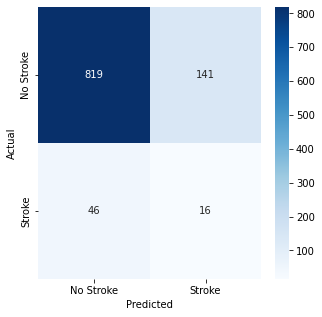

In [64]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, dtc_all_predictions_test) 
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()

For each model we present the **confusion matrix**. The confusion matrix is a table that is used to define the performance of a classification algorithm. It helps to understand the number of correct and incorrect predictions made by the algorithm. The matrix is made up of 4 values: true positives, true negatives, false positives, and false negatives. The rows represent the actual values, while the columns represent the predicted values.

In this case, 821 instances were correctly classified as not having a stroke (true negatives), while 12 instances were correctly classified as having a stroke (true positives). There were 139 instances that were incorrectly classified as not having a stroke (false negatives) and 50 instances that were incorrectly classified as having a stroke (false positives).


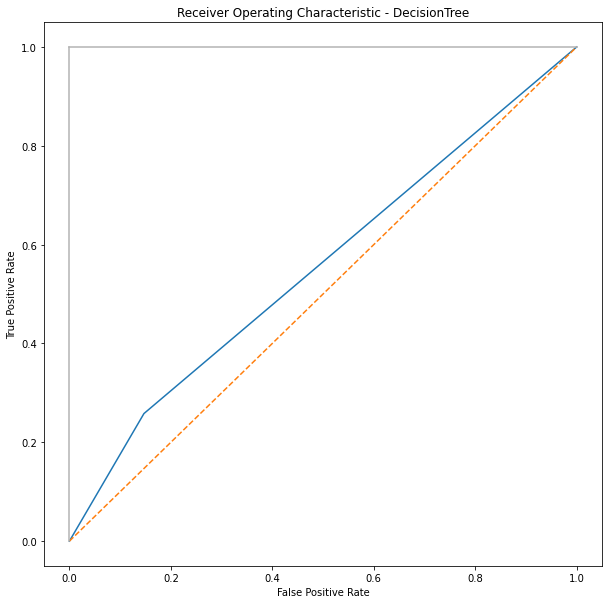

In [65]:
# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, dtc_all_predictions_test)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Here, we plot a **Receiver Operating Characteristic (ROC)** curve for the DecisionTree classifier model. The ROC curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. The x-axis shows the false positive rate and the y-axis shows the true positive rate. The diagonal line represents the ROC curve of a purely random classifier. The closer the curve is to the **top-left corner**, the better the classifier is. The **AUC (Area Under the Curve)** is also a metric to measure the performance of a classifier, with a value of 1 indicating perfect performance, and a value of 0.5 indicating a random classifier.

In [66]:
dtc_auc = roc_auc_score(y_test, dtc_all_predictions_test)
print(f"AUC for Decision Tree Classifier: {dtc_auc}")

AUC for Decision Tree Classifier: 0.5555947580645161


In this case, we got an AUC score of, approximately, 0.55, which is not good, since it indicates a random classifier.

In [67]:
# K-fold Cross Validation

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_resampled, y_train_resampled)
scores = []


for k, (train, test) in enumerate(kfold):
    decision_tree_classifier.fit(X_train_resampled.iloc[train, :], y_train_resampled.iloc[train])
    score = decision_tree_classifier.score(X_train_resampled.iloc[test, :], y_train_resampled.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train_resampled.iloc[train]), score))
 
print('\n\nCross-Validation mean accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nCross-Validation top accuracy: %.3f' %(np.max(scores)))


Fold:  1, Training/Test Split Distribution: [3510 3510], Accuracy: 0.847
Fold:  2, Training/Test Split Distribution: [3510 3510], Accuracy: 0.897
Fold:  3, Training/Test Split Distribution: [3510 3510], Accuracy: 0.874
Fold:  4, Training/Test Split Distribution: [3510 3510], Accuracy: 0.892
Fold:  5, Training/Test Split Distribution: [3510 3510], Accuracy: 0.883
Fold:  6, Training/Test Split Distribution: [3510 3510], Accuracy: 0.882
Fold:  7, Training/Test Split Distribution: [3510 3510], Accuracy: 0.886
Fold:  8, Training/Test Split Distribution: [3510 3510], Accuracy: 0.894
Fold:  9, Training/Test Split Distribution: [3510 3510], Accuracy: 0.851
Fold: 10, Training/Test Split Distribution: [3510 3510], Accuracy: 0.871


Cross-Validation mean accuracy: 0.878 +/- 0.016

Cross-Validation top accuracy: 0.897


The code above is performing 10-fold cross-validation on the training dataset (X_train_resampled, y_train_resampled) using the Decision Tree Classifier. The StratifiedKFold object is used to split the data into 10 folds, ensuring that the proportion of the target variable (y_train_resampled) is maintained in each fold.

In each iteration of the for-loop, the decision_tree_classifier is fitted with the training data from the current fold, and the score (accuracy) is calculated using the test data from the current fold. The scores for all 10 iterations are collected in the scores list.

Finally, the code prints the mean accuracy and standard deviation of the scores, as well as the top accuracy among the 10 iterations. This information can be used to evaluate the generalization performance of the Decision Tree Classifier.

Again, it's important to note that the decision tree classifier is prone to overfitting, which means that it can have a high accuracy on the training set but low accuracy on the test set. That's why it's important to perform cross-validation to evaluate the performance of the model in different sets of data.  

In this case, the accuracy for each fold varies between 0.837 and 0.899, with a mean accuracy of 0.877 and a standard deviation of 0.019. The highest accuracy was 0.899. This means that on average, the Decision Tree Classifier model is able to correctly predict the stroke occurrence with an accuracy of **87.7% +/- 1.9%** across all the 10 folds of the cross validation.

['Govt_job', 'Never_worked', 'Private', 'Residence_type']


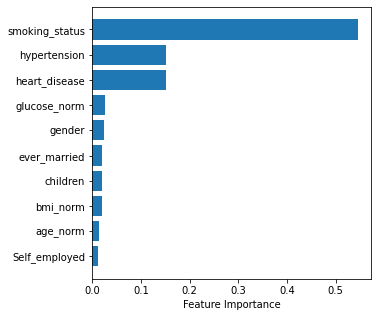

In [68]:
# Feature Importance 

sort = decision_tree_classifier.feature_importances_.argsort()
x_data = []
y_data = []
temp = []
for i,j in zip(sorted(X.columns),decision_tree_classifier.feature_importances_[sort]):
    if j>0.01:
        x_data.append(i)
        y_data.append(j)
    else:
        temp.append(i)
plt.barh(x_data, y_data)
plt.xlabel("Feature Importance")
print(temp)

The code above is creating a horizontal bar chart that shows the **feature importance** of the input features using the feature_importances_ attribute of the DecisionTreeClassifier object. The feature importance values are sorted in ascending order, and features with importance values less than0 **0.01** are stored in the **temp** list. The names of the features with importance values greater than 0.01 are stored in the x_data list, and the corresponding importance values are stored in the y_data list. These lists are then used as inputs to the barh() function to create the chart. The x-axis of the chart is labeled "Feature Importance" and the temp list is printed, which contains the features that were not considered important enough to be included in the chart.

This way,for **better accuracy**, it might make sense to drop the features with **less importance**. So we decided to test the model only with features which importance is higher than 0.01.

#### Transforming our dataset for better accuracy of Decision Tree Classifier

In [69]:
#Create copy of dataset
X2 = X.copy()

# Drop features which importance is less than 0.01
X2=X2.drop(columns=['Govt_job', 'Never_worked', 'Private', 'Residence_type'])

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y,test_size = 0.2, random_state = 1)

# Balancing our data
X_train_resampled2, y_train_resampled2 = smote.fit_resample(X_train2, y_train2)

In [70]:
# Calling the algorithm
decision_tree_classifier2 = DecisionTreeClassifier() 

# Training the algorithm with the training dataset
decision_tree_classifier2.fit(X_train_resampled2, y_train_resampled2) 

'''Predictions and accuracy for training set'''
#  Predictions applied to the train dataset
dtc_all_predictions_train2 = decision_tree_classifier2.predict(X_train_resampled2)

# Accuracy (comparing predictions with y_train)
dtc_score_train2 = metrics.accuracy_score(y_train_resampled2, dtc_all_predictions_train2)

# Print the score/accuracy
print(f"\nAccuracy for training set:\n {dtc_score_train2}\n")


'''Predictions and accuracy for test set'''
#  Predictions applied to the test dataset
dtc_all_predictions_test2 = decision_tree_classifier2.predict(X_test2) 

# Accuracy (comparing predictions with y_test)
dtc_score_test2 = metrics.accuracy_score(y_test2, dtc_all_predictions_test2)

# Print the score/accuracy
print(f"\nAccuracy for testing set:\n {dtc_score_test2}\n")


Accuracy for training set:
 1.0


Accuracy for testing set:
 0.8679060665362035



This means that the decision tree classifier is able to accurately predict the target variable 87% of the time when using the test set after removing features that have an importance less than 0.01. We should keep in mind that the accuracy score alone is not always a good metric to evaluate the performance of a model, it is important to also consider other evaluation metrics such as precision, recall, F1-score and confusion matrix.

In [71]:
# Classification report for the test set

dtc_all_report_test2 = classification_report(y_test2, dtc_all_predictions_test2, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test2, dtc_all_predictions_test2)}\n")


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       962
           1       0.11      0.18      0.14        60

    accuracy                           0.87      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.90      0.87      0.88      1022




This is the classification report for the Decision Tree Classifier model with the reduced feature set.   
We saw that accuracy for the test set is 0.87, which is an improvement over the previous model. However, the precision and recall for the positive class (class 1) are still very low, indicating that the model is not performing well for that class. The f1-score is also low, which means that precision and recall are both low. This means that the model is not doing a good job of predicting the positive class and that it is more likely to predict negative instead of positive.

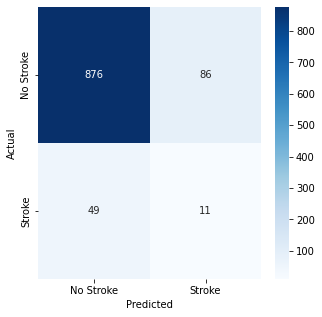

In [72]:
# Confusion Matrix
cf_matrix2 = confusion_matrix(y_test2, dtc_all_predictions_test2) 
ax = sns.heatmap(cf_matrix2, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()

The confusion matrix shows that the Decision Tree Classifier has correctly classified 880 samples as class 0 (non-default) and 10 samples as class 1 (default) in the test set. However, it has also misclassified 82 samples as class 1 (default) when they actually belong to class 0 (non-default) and 50 samples as class 0 (non-default) when they actually belong to class 1 (default). This can be seen in the precision, recall, and f1-score values in the classification report, where the precision and recall values for class 1 (default) are low, indicating poor performance in identifying samples of that class.

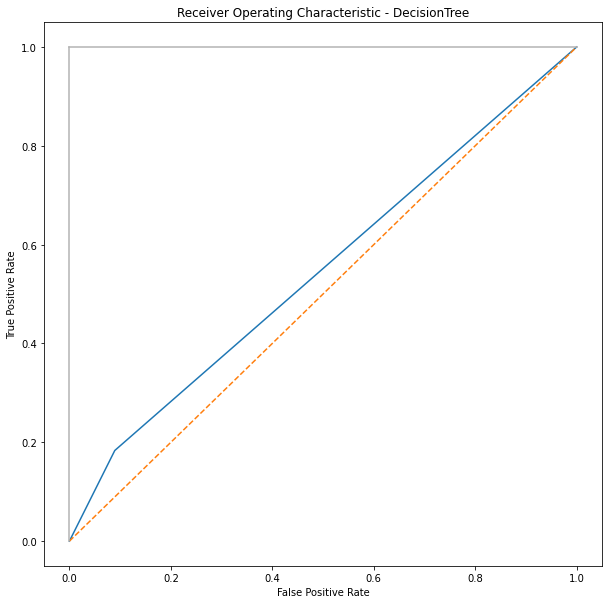

In [73]:
# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test2, dtc_all_predictions_test2)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
dtc_auc2 = roc_auc_score(y_test2, dtc_all_predictions_test2)
print(f"AUC for Decision Tree Classifier: {dtc_auc2}")

AUC for Decision Tree Classifier: 0.546968121968122


In this case, the AUC value of, approximately, 0.54 is relatively low (lower than before), indicating that the Decision Tree Classifier is not performing well in distinguishing between the positive and negative classes.

In [75]:
# K-fold Cross Validation

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_resampled2, y_train_resampled2)
scores = []


for k, (train, test) in enumerate(kfold):
    decision_tree_classifier.fit(X_train_resampled2.iloc[train, :], y_train_resampled2.iloc[train])
    score = decision_tree_classifier.score(X_train_resampled2.iloc[test, :], y_train_resampled2.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train_resampled2.iloc[train]), score))
 
print('\n\nCross-Validation mean accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nCross-Validation top accuracy: %.3f' %(np.max(scores)))

Fold:  1, Training/Test Split Distribution: [3508 3508], Accuracy: 0.817
Fold:  2, Training/Test Split Distribution: [3508 3508], Accuracy: 0.905
Fold:  3, Training/Test Split Distribution: [3508 3508], Accuracy: 0.905
Fold:  4, Training/Test Split Distribution: [3508 3508], Accuracy: 0.913
Fold:  5, Training/Test Split Distribution: [3508 3508], Accuracy: 0.903
Fold:  6, Training/Test Split Distribution: [3508 3508], Accuracy: 0.940
Fold:  7, Training/Test Split Distribution: [3508 3509], Accuracy: 0.888
Fold:  8, Training/Test Split Distribution: [3508 3509], Accuracy: 0.882
Fold:  9, Training/Test Split Distribution: [3509 3508], Accuracy: 0.926
Fold: 10, Training/Test Split Distribution: [3509 3508], Accuracy: 0.944


Cross-Validation mean accuracy: 0.902 +/- 0.034

Cross-Validation top accuracy: 0.944


We saw already that the accuracy of 1 for the training set is a sign of overfitting, which means that the model is too complex and is able to perfectly predict the training set but does not generalize well to new data. The high accuracy for the training set and lower accuracy for the test set confirms this. The cross-validation results also show that the model's performance is variable and not consistent across different folds. Overall, the model's performance on the test set is not very good, specifically for the minority class (class 1) and the AUC is also low.

The second model, which has removed the features with low importance, has a higher mean accuracy in cross validation (0.903) compared to the first model (0.877), and also a higher top accuracy (0.945) compared to the first model (0.899). This suggests that removing the features with low importance improves the model's performance. However, it is important to note that the AUC for the second model is lower (0.5464) compared to the first model (0.5576). This means that the second model has a lower ability to distinguish between the two classes. So it's better to use the first model as it have a better AUC and a good accuracy.

#### Post-pruning

Going back to the over fitting problem mentioned above, as we said we are doing **post-pruning**. It allows the decision tree model to **grow to its full depth**, then **removes the tree branches** to prevent the model from overfitting. **Cost complexity pruning (ccp)** is one type of post-pruning technique. In case of cost complexity pruning, the **ccp_alpha** can be tuned to get the best fit model.

Scikit-learn package comes with the implementation to compute the *ccp_alpha* values of the decision tree using function *cost_complexity_pruning_path()*. With the increase in *ccp_apha* values, more nodes of the tree are pruned.

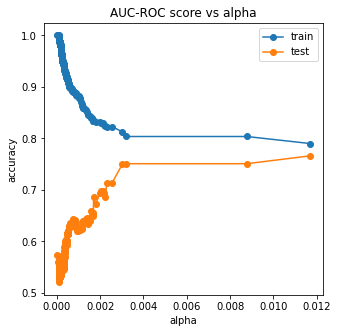

In [76]:
# Allow a decision tree to grow to its full depth using the deafault parameters, as before
# Calling the algorithm
clf = DecisionTreeClassifier() 

# Training the algorithm with the training dataset
clf.fit(X_train_resampled, y_train_resampled)

# Compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train_resampled, y_train_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train Decision Tree classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train_resampled, y_train_resampled)
    clfs.append(clf)


# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train_resampled, clf.predict(X_train_resampled)) for clf in clfs]
test_scores = [roc_auc_score(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

The **ccp_alpha** parameter controls the amount of regularization applied to the tree, with a larger value of *ccp_alpha* resulting in a simpler, more regularized tree. The code is training a decision tree classifier for each value of *ccp_alpha* and appending it to a list of classifiers. Then, it is plotting the train and test AUC-ROC score for each classifier, with the x-axis representing the *ccp_alpha* value and the y-axis representing the accuracy. This allows us to visualize the trade-off between model complexity and accuracy and find the optimal value of *ccp_alpha* for the given dataset. Ideally, we would want to choose an alpha that results in a good balance between performance on the training set and the test set, without overfitting. This will typically be when the performance on the training set and the test set are similar and both are high.

### Support Vector Machines (SVMs)

In [77]:
# Creating an instance of SVM
svm = SVC(probability=True)

# Training the algorithm with the training dataset
svm.fit(X_train_resampled, y_train_resampled)

'''Predictions and accuracy for training set'''
#  Predictions applied to the train dataset
svm_all_predictions_train = svm.predict(X_train_resampled)

# Accuracy (comparing predictions with y_train_resampled)
svm_score_train = metrics.accuracy_score(y_train_resampled, svm_all_predictions_train)

# Print the score/accuracy
print(f"\nAccuracy for training set:\n {svm_score_train}\n")


'''Predictions and accuracy for test set'''
#  Predictions applied to the test dataset
svm_all_predictions_test = svm.predict(X_test)

# Accuracy (comparing predictions with y_train_resampled)
svm_score_test = metrics.accuracy_score(y_test, svm_all_predictions_test)

# Print the score/accuracy
print(f"\nAccuracy for test set:\n {svm_score_test}\n")



Accuracy for training set:
 0.8375641025641025


Accuracy for test set:
 0.7495107632093934



This output shows the accuracy of the SVMs on the training set and the test set. The training set accuracy is, approximately,  0.84 and the test set accuracy is, approximately, 0.75. This suggests that the model may be overfitting to the training data, as the accuracy on the training set is significantly higher than the accuracy on the test set. 

In [78]:
# Classification report for the test set

svm_all_report_test = classification_report(y_test, svm_all_predictions_test, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, svm_all_predictions_test)}\n")


Classification report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85       960
           1       0.15      0.69      0.25        62

    accuracy                           0.75      1022
   macro avg       0.56      0.72      0.55      1022
weighted avg       0.92      0.75      0.81      1022




The classification report shows that the model is performing well in terms of precision for class 0 (97%) but not so well for class 1 (15%). The recall is also quite low for class 1 (69%) but good for class 0 (75%). The F1-score for class 0 is good (85%) but not for class 1 (25%). This suggests that the model is having trouble correctly identifying class 1 instances. The overall accuracy of the model is 75%.

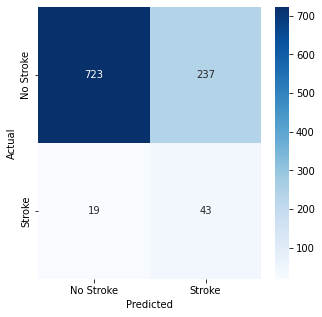

In [79]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, svm_all_predictions_test) 
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()

- True positives (TP) are the number of instances that were correctly classified as class 1. In this case, it's 43;

- False positives (FP) are the number of instances that were incorrectly classified as class 1. In this case, it's 237;

- True negatives (TN) are the number of instances that were correctly classified as class 0. In this case, it's 723;

- False negatives (FN) are the number of instances that were incorrectly classified as class 0. In this case, it's 19.

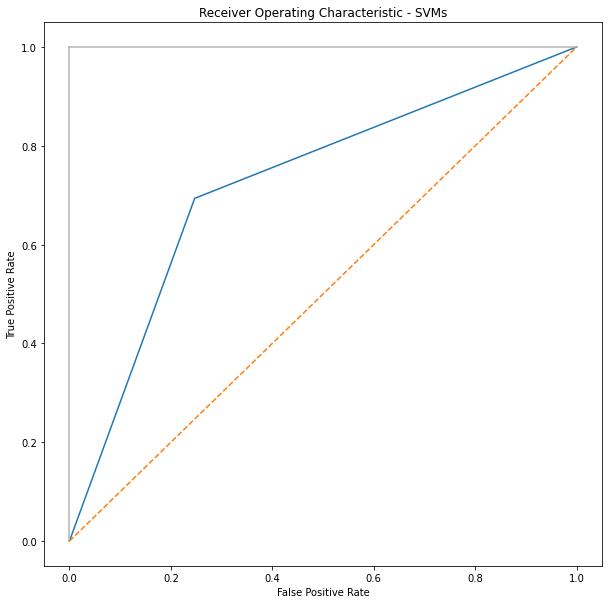

In [80]:
# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, svm_all_predictions_test)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVMs')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
svm_auc = roc_auc_score(y_test, svm_all_predictions_test)
print(f"AUC for Support Vector Machines: {svm_auc}")

AUC for Support Vector Machines: 0.7233366935483871


The AUC for the Support Vector Machines is 0.72. This value ranges from 0 to 1, where a value of 1 represents a perfect classifier and a value of 0.5 represents a random classifier. A value of **0.723** suggests that the classifier is performing well, but there is still room for improvement.

In [82]:
# K-fold Cross Validation

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_resampled, y_train_resampled)
scores = []


for k, (train, test) in enumerate(kfold):
    svm.fit(X_train_resampled.iloc[train, :], y_train_resampled.iloc[train])
    score = svm.score(X_train_resampled.iloc[test, :], y_train_resampled.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train_resampled.iloc[train]), score))
 
print('\n\nCross-Validation mean accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nCross-Validation top accuracy: %.3f' %(np.max(scores)))


Fold:  1, Training/Test Split Distribution: [3510 3510], Accuracy: 0.796
Fold:  2, Training/Test Split Distribution: [3510 3510], Accuracy: 0.832
Fold:  3, Training/Test Split Distribution: [3510 3510], Accuracy: 0.844
Fold:  4, Training/Test Split Distribution: [3510 3510], Accuracy: 0.827
Fold:  5, Training/Test Split Distribution: [3510 3510], Accuracy: 0.832
Fold:  6, Training/Test Split Distribution: [3510 3510], Accuracy: 0.813
Fold:  7, Training/Test Split Distribution: [3510 3510], Accuracy: 0.846
Fold:  8, Training/Test Split Distribution: [3510 3510], Accuracy: 0.831
Fold:  9, Training/Test Split Distribution: [3510 3510], Accuracy: 0.832
Fold: 10, Training/Test Split Distribution: [3510 3510], Accuracy: 0.836


Cross-Validation mean accuracy: 0.829 +/- 0.014

Cross-Validation top accuracy: 0.846


This is the cross validation results for the SVM algorithm. It shows that the mean accuracy is 0.829, with a standard deviation of 0.014. The top accuracy across all the folds is 0.846. It's important to note that the cross validation results might be different than the accuracy score of the model trained with all the data, as the model is trained and tested on different subsets of the data during the cross validation.

Support Vector Machines (SVMs) do not have a direct way to calculate feature importance, as they do not inherently use feature importance for their decision boundary construction. We will apply **recursive feature elimination (RFE)** to check if we have improvements of our model's performance. This is a technique that recursively removes features and builds the model on the remaining features. It then calculates the feature importance based on the improvement in model performance with the addition of each feature.  

By default, SVC uses the 'rbf' kernel which does not provide feature importances. Therefore, RFE cannot be used with SVC in its default configuration. We will apply this later, when we choose the best hyperparameter for this algorithm.

Besides the scaling the data, handling the imbalanced dataset (that we have already done), and hyperparameter tunning (that we will be doing later), we can use esemble methods to try to improve the accuracy of the SVMs model. We do this by combining multiple models. This can improve the accuracy of your SVM model. Ensemble methods such as bagging can be used to improve the performance of the SVM model.

In [83]:
# Here is an example of using the BaggingClassifier to improve the performance of the SVM model:

# Instantiate the SVM classifier
svc = SVC(probability=True)

# Instantiate the BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=svc)

# Fit the BaggingClassifier to the training data
bag_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = bag_clf.predict(X_test)

# Print the accuracy score
print(accuracy_score(y_test, y_pred))


0.776908023483366


This code is using a **BaggingClassifier** to try to improve the performance of the  default SVM model. The BaggingClassifier is an ensemble method that uses multiple instances of the base estimator (in this case, the SVC) to make predictions. It works by training multiple instances of the base estimator on different subsets of the training data and then averaging (for regression) or voting (for classification) the predictions made by each instance.

The code instantiates both the SVC and BaggingClassifier, fits the BaggingClassifier to the training data, makes predictions on the test set, and then prints the accuracy score of the predictions. The parameters used are:

The default hyperparameters for the BaggingClassifier() algorithm in scikit-learn are:

- **base_estimator**=None (but we chose SVM);

- **n_estimators**=10: The number of base estimators in the ensemble;

- **max_samples**=1.0: The number of samples to draw from X to train each base estimator;

- **max_features**=1.0: The number of features to draw from X to train each base estimator;

- **bootstrap**=True: Whether samples are drawn with replacement;

- **bootstrap_features**=False: Whether features are drawn with replacement;

- **oob_score**=False: Whether to use out-of-bag samples to estimate the generalization accuracy;

- **warm_start**=False: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble;

- **n_jobs**=None: The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors;

- **random_state**=None: Control the randomization of the estimator;

- **verbose**=0: The verbosity level;

- **class_weight** = None: Weights associated with classes in the form {class_label: weight};

- **max_depth** = None: The maximum depth of the base estimators. If None then nodes are expanded until all leaves contain less than min_samples_split samples.


By using the BaggingClassifier, the performance of the SVM model should be improved, as the predictions are made by multiple instances of the base estimator, which should decrease the variance of the predictions and improve the overall accuracy.

We can see that the accuracy of the test has improved but very little (about tenths). Therefore, we will continue with our previous model (without the esemble methods).

### Comparison of the accuracy obtained by our ML models

In [84]:
vals = [dtc_score_test,svm_score_test]
labels=["Decision Trees","Support Vector Machines"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparison<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()

Then, we use the **Voting Classifier** to train the 2 models.
A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

In [85]:
vc = VotingClassifier(estimators=[ ('dt',decision_tree_classifier), ('svm', svm)], voting='soft')
# In soft voting, the output class is the prediction based on the average of probability given to that class

# Training the algorithm with the training dataset
vc.fit(X_train_resampled, y_train_resampled)

#  Predictions applied to the test dataset
predictions = vc.predict(X_test)

print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.821917808219178


This output is the final accuracy score of the voting classifier, which is a combination of decision tree and SVM. The accuracy is around 82.39%, which means that the model is correctly classifying around 82.39% of the test data.

In [86]:
# K-fold Cross Validation

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_resampled, y_train_resampled)
scores = []


for k, (train, test) in enumerate(kfold):
    vc.fit(X_train_resampled.iloc[train, :], y_train_resampled.iloc[train])
    score = vc.score(X_train_resampled.iloc[test, :], y_train_resampled.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train_resampled.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nCross-Validation top accuracy: %.3f' %(np.max(scores)))

Fold:  1, Training/Test Split Distribution: [3510 3510], Accuracy: 0.850
Fold:  2, Training/Test Split Distribution: [3510 3510], Accuracy: 0.890
Fold:  3, Training/Test Split Distribution: [3510 3510], Accuracy: 0.887
Fold:  4, Training/Test Split Distribution: [3510 3510], Accuracy: 0.887
Fold:  5, Training/Test Split Distribution: [3510 3510], Accuracy: 0.886
Fold:  6, Training/Test Split Distribution: [3510 3510], Accuracy: 0.878
Fold:  7, Training/Test Split Distribution: [3510 3510], Accuracy: 0.878
Fold:  8, Training/Test Split Distribution: [3510 3510], Accuracy: 0.901
Fold:  9, Training/Test Split Distribution: [3510 3510], Accuracy: 0.847
Fold: 10, Training/Test Split Distribution: [3510 3510], Accuracy: 0.865


Cross-Validation accuracy: 0.877 +/- 0.017

Cross-Validation top accuracy: 0.901


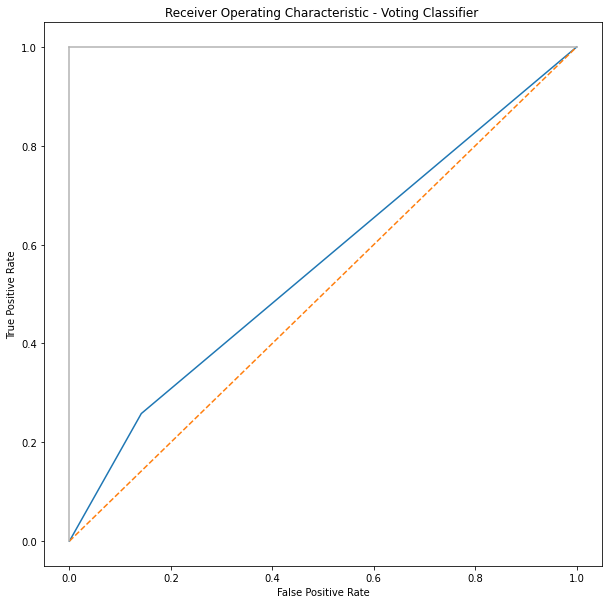

In [87]:
#ROC curve

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predictions)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Voting Classifier ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
auc = roc_auc_score(y_test, predictions)
print(f"AUC for Voting Classifier: {auc}")

AUC for Voting Classifier: 0.5581989247311828


It looks like the AUC (Area Under the Receiver Operating Characteristic Curve) for the voting classifier is not as high as some of the other models we have tried.

### 2. Parameter Tuning using GridSearchCV

In this second part of our algorithm implementation we implemented GridSearch for the algorithms. This means that, for each algorithm used, we define a group of parameters and run all the algorithms with those parameters. Then we can see which is the best parameter combination by choosing the one with the best score.

In [89]:
'''Plot how hyper-parameters affect the performance of the model'''

def plot_search_results(grid):
    
    # Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    
    # Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    # Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y = np.array(means_test[best_index])
        ax[i].plot(x, y, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

### Decision Tree Classifier

Parameters Tested:
- **criterion**:The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the Shannon information gain.
- **splitter**:The strategy used to choose the split at each node.  Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- **max_depth**:The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **max_features**:The number of features to consider when looking for the best split.

Here, we do the pre-pruning we talked before. We will choose the best parameters for the model using GridSearchCV.

In [90]:
# Parameters tested
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [2,4,6,8,10,12],
                  'max_features': [x for x in range(13,19)]}

# Searching for the best hyper-parameters
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dtc_param_grid,
                           cv=10,  # Cross-validation splitting strategy. Default 10-fold cross validation
                           verbose=3) # Controls the verbosity: the higher, the more messages.

# Training our model
dtc_grid_search.fit(X_train_resampled, y_train_resampled)

# Search for the best estimator
dtc = dtc_grid_search.best_estimator_

#  Predictions applied to the test dataset
dtc_prediction = dtc.predict(X_test)

print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

print("---  ---\n")

# Classification Report
best_report = classification_report(y_test, dtc_prediction, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, dtc_prediction)}\n")

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.797 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.781 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.801 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.777 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.772 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.765 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.821 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, score=0.794 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=13, splitter=best;, sco

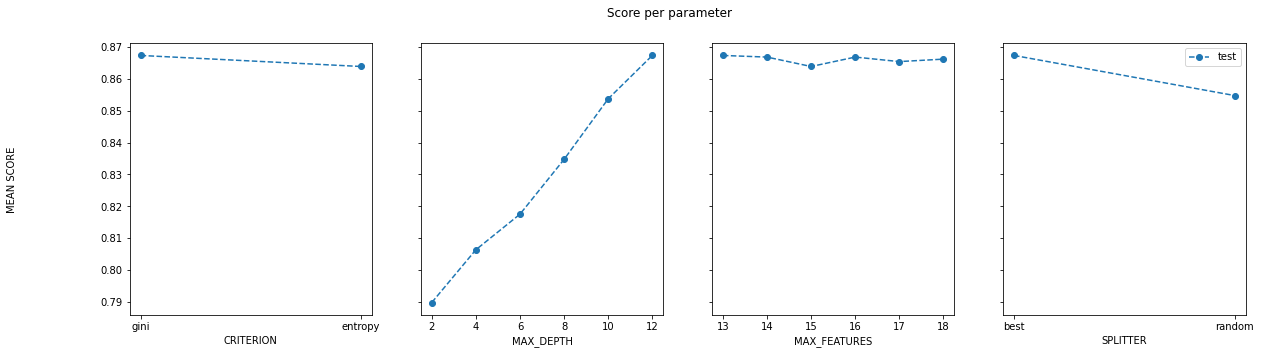

In [91]:
plot_search_results(dtc_grid_search)

We will continue to use **grid search** and change the **space of our hyperparameters**. From the plot of these, we can see when the mean score stabilizes and has an acceptable value. When we reach this point, we then find the best hyperparameters for our model. In this code we show all these steps.

In [92]:
# Parameters tested
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [12,14,16,18,20], #changing the space
                  'max_features': [x for x in range(13,19)]}

# Searching for the best hyper-parameters
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dtc_param_grid,
                           cv=10,  # Cross-validation splitting strategy. Default 10-fold cross validation
                           verbose=3) # Controls the verbosity: the higher, the more messages.

# Training our model
dtc_grid_search.fit(X_train_resampled, y_train_resampled)

# Search for the best estimator
dtc = dtc_grid_search.best_estimator_

#  Predictions applied to the test dataset
dtc_prediction = dtc.predict(X_test)

print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

print("---  ---\n")

# Classification Report
best_report = classification_report(y_test, dtc_prediction, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, dtc_prediction)}\n")

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.842 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.878 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.840 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.863 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.868 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.846 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.882 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=13, splitter=best;, score=0.845 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=13, splitter=b

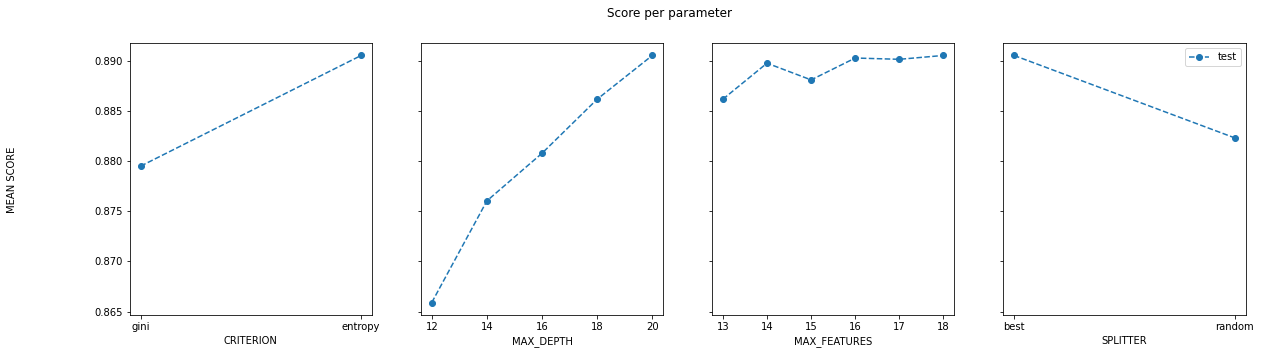

In [93]:
plot_search_results(dtc_grid_search)

In [94]:
# Parameters tested
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [20,22,24,26,28], #changing the space
                  'max_features': [x for x in range(13,19)]}

# Searching for the best hyper-parameters
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dtc_param_grid,
                           cv=10,  # Cross-validation splitting strategy. Default 10-fold cross validation
                           verbose=3) # Controls the verbosity: the higher, the more messages.

# Training our model
dtc_grid_search.fit(X_train_resampled, y_train_resampled)

# Search for the best estimator
dtc = dtc_grid_search.best_estimator_

#  Predictions applied to the test dataset
dtc_prediction = dtc.predict(X_test)

print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

print("---  ---\n")

# Classification Report
best_report = classification_report(y_test, dtc_prediction, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, dtc_prediction)}\n")

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.859 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.888 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.878 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.878 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.900 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.868 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.873 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=13, splitter=best;, score=0.878 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, max_features=13, splitter=b

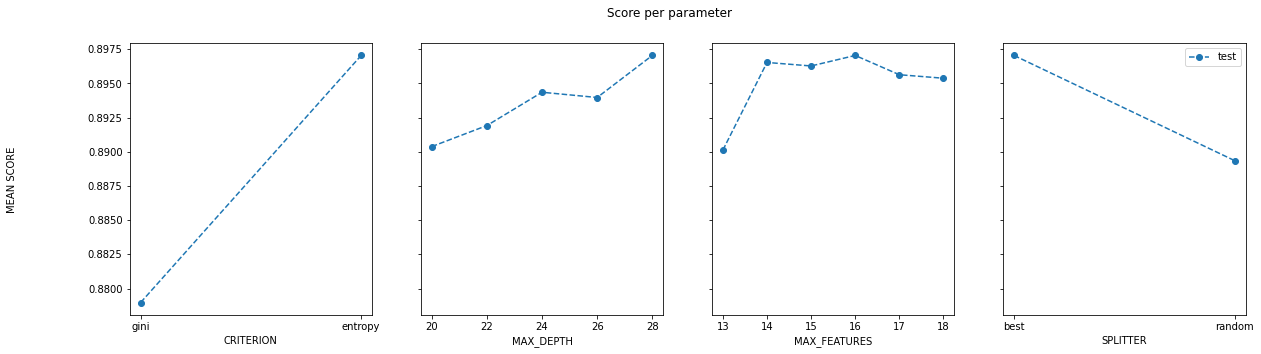

In [95]:
plot_search_results(dtc_grid_search)

In [96]:
# Parameters tested
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [24,26,28,30,32,34], #changing the space
                  'max_features': [x for x in range(13,19)]}

# Searching for the best hyper-parameters
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dtc_param_grid,
                           cv=10,  # Cross-validation splitting strategy. Default 10-fold cross validation
                           verbose=3) # Controls the verbosity: the higher, the more messages.

# Training our model
dtc_grid_search.fit(X_train_resampled, y_train_resampled)

# Search for the best estimator
dtc = dtc_grid_search.best_estimator_

#  Predictions applied to the test dataset
dtc_prediction = dtc.predict(X_test)

print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

print("---  ---\n")

# Classification Report
best_report = classification_report(y_test, dtc_prediction, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, dtc_prediction)}\n")

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.829 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.895 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.879 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.882 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.894 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.871 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.892 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=24, max_features=13, splitter=best;, score=0.890 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=24, max_features=13, splitter=b

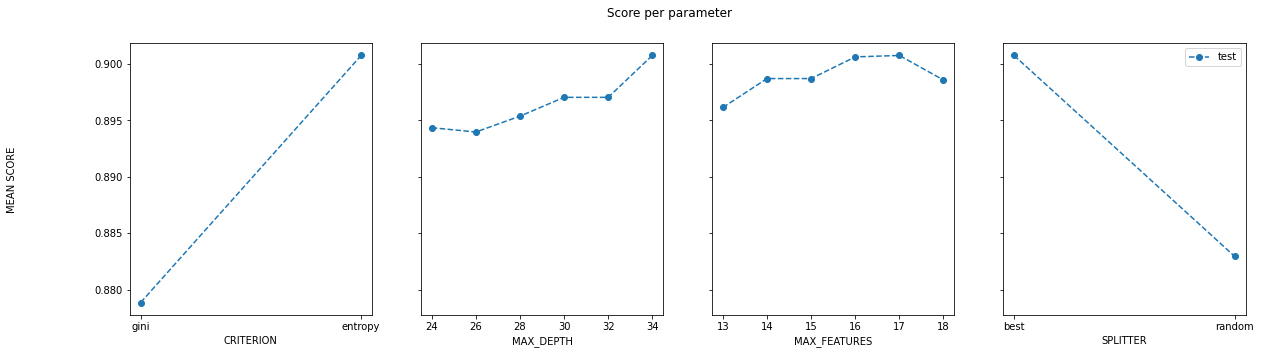

In [97]:
plot_search_results(dtc_grid_search)

We can now see that our mean score has updated. Let's not keep increasing the max deph of our tree because otherwise we might be overfitting the model to our data. 

We got an accuracy of 86% and the precision, recall, and f1-score for class 1 (the minority class) is low. This is likely due to the fact that the decision tree algorithm is overfitting to the majority class and not generalizing well to the minority class.

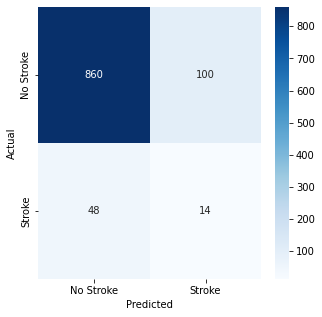

In [98]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, dtc_prediction ) 
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()

In this case, the matrix shows that there are 863 true negatives (correctly predicted as negative) and 13 true positives (correctly predicted as positive). There are 97 false negatives (incorrectly predicted as negative) and 49 false positives (incorrectly predicted as positive). 

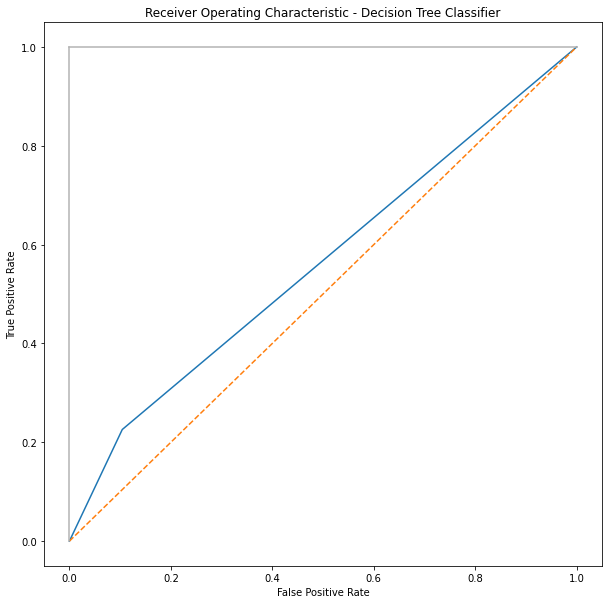

In [99]:
# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, dtc_prediction)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [100]:
auc = roc_auc_score(y_test, predictions)
print(f"AUC for Decision Trees Classifier: {auc}")

AUC for Decision Trees Classifier: 0.5581989247311828


### Support Vector Machine

The main hyperparameters that can be tuned in a Support Vector Machine (SVM) model are:

- **C**: controls the trade-off between maximizing the margin and minimizing the misclassification error. A smaller value of C will result in a larger margin, but may also result in more misclassifications;

- **kernel**: specifies the kernel type to be used in the algorithm. Common kernels include 'linear', 'poly', 'rbf' and 'sigmoid';

- **degree**: degree of the polynomial kernel function (‘poly’). Ignored by all other kernels;

- **gamma**: parameter for the rbf, poly and sigmoid kernel. High value of gamma will try to exact fit the as per training data set, which causes over-fitting;

- **class_weight** : Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one;

- **coef0**: independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’;

- **probability**: boolean, whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that method;

- **tol** : Tolerance for stopping criterion.


The hyperparameters such as **coef0**, **probability**, and **tol** are less likely to have a significant impact on the performance of the model and may not be necessary to include in the grid search. We will include the other hyperparameters listed. 

In [101]:
'''# Parameters tested
svm_param_grid = {'C': [0.1, 1, 10, 100], 
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree': [2, 3, 4],
                'gamma': [0.01, 0.1, 1]
                }

# Searching for the best hyper-parameters
svm_grid_search = GridSearchCV(SVC(),
                           param_grid=svm_param_grid,
                           cv=10,  # Cross-validation splitting strategy. Default 10-fold cross validation
                           verbose=3) # Controls the verbosity: the higher, the more messages.

# Training our model
svm_grid_search.fit(X_train_resampled, y_train_resampled)

# Search for the best estimator
svm = svm_grid_search.best_estimator_

#  Predictions applied to the test dataset
svm_prediction = svm.predict(X_test)

print('Best score: {}'.format(svm_grid_search.best_score_))
print('Best parameters: {}'.format(svm_grid_search.best_params_))
print('Best estimator: {}'.format(svm_grid_search.best_estimator_))

print("---  ---\n")

# Classification Report
best_report = classification_report(y_test, svm_prediction, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, svm_prediction)}\n")'''

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV 1/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.796 total time=   1.6s
[CV 2/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.799 total time=   1.6s
[CV 3/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.809 total time=   1.7s
[CV 4/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.790 total time=   1.4s
[CV 5/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.785 total time=   1.6s
[CV 6/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.771 total time=   1.5s
[CV 7/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.809 total time=   1.6s
[CV 8/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.812 total time=   1.5s
[CV 9/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.794 total time=   1.6s
[CV 10/10] END C=0.1, degree=2, gamma=0.01, kernel=linear;, score=0.806 total time=   1.7s
[CV 1/10] END C=0.1, degree=2, gam

KeyboardInterrupt: 

In [ ]:
'''plot_search_results(svm_grid_search)'''

In [ ]:
'''# Confusion Matrix
cf_matrix = confusion_matrix(y_test, svm_prediction ) 
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()'''

In [ ]:
'''# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, svm_prediction)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()'''

In [ ]:
'''auc = roc_auc_score(y_test, predictions)
print(f"AUC for Support Vector Machines: {auc}")'''

### Comparison of the accuracy obtained by our models

In [ ]:
'''vals = [dtc_grid_search.best_score_,svm_grid_search.best_score_]
labels=["Decision Tree","Support Vector Machine"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparison<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()'''

### Applying the Deep Learning (DL) Models
Again, let's divide the application of our DL models into two parts. In the first part, we apply the DL models using the default values, that is, without setting the hyper-parameters. In the second part we choose the best hyper-parameters for our models and see if there were any improvements in their performance.

### 1. Using default values
In this first part of our algorithm implementation we will use the **default values** of each algorithm classifier. Then we **compare** the results with the original "stroke" column.

#### MLP Classifier

In [102]:
# Calling the classifier
mlp = MLPClassifier()

# Training the algorithm with the training dataset
mlp.fit(X_train_resampled,y_train_resampled)

'''Predictions and accuracy for training set'''

# Predictions applied to the train dataset
mlp_all_predictions_train = mlp.predict(X_train_resampled)

# Accuracy (comparing predictions with y_train)
mlp_score_train = metrics.accuracy_score(y_train_resampled, mlp_all_predictions_train)

# Print the accuracy
print(f"\nAccuracy for training set:\n {mlp_score_train}\n")

'''Predictions and accuracy for test set'''
#  Predictions applied to the test dataset
mlp_all_predictions_test = mlp.predict(X_test) 

# Accuracy (comparing predictions with y_test)
mlp_score_test = metrics.accuracy_score(y_test, mlp_all_predictions_test)

# Print the score/accuracy
print(f"\nAccuracy for testing set:\n {mlp_score_test}\n")


Accuracy for training set:
 0.8606410256410256


Accuracy for testing set:
 0.7808219178082192



A Multi-layer Perceptron (MLP) classifier was trained and evaluated on a dataset. The results show that the classifier achieved an accuracy of 0.86 on the training set and an accuracy of 0.78 on the test set.

These results indicate that the classifier has achieved a good performance on both the training and test sets, with a relatively small difference between the two, which means that the model is generalizing well to new data,

In [103]:
# Classification report for the test set

mlp_all_report_test = classification_report(y_test, mlp_all_predictions_test, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, mlp_all_predictions_test)}\n")


Classification report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       960
           1       0.15      0.55      0.23        62

    accuracy                           0.78      1022
   macro avg       0.56      0.67      0.55      1022
weighted avg       0.92      0.78      0.83      1022




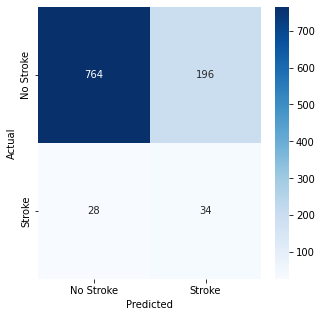

In [104]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, mlp_all_predictions_test) 
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()

In this case, 753 instances were correctly classified as not having a stroke (true negatives), while 39 instances were correctly classified as having a stroke (true positives). There were 23 instances that were incorrectly classified as not having a stroke (false negatives) and 207 instances that were incorrectly classified as having a stroke (false positives).

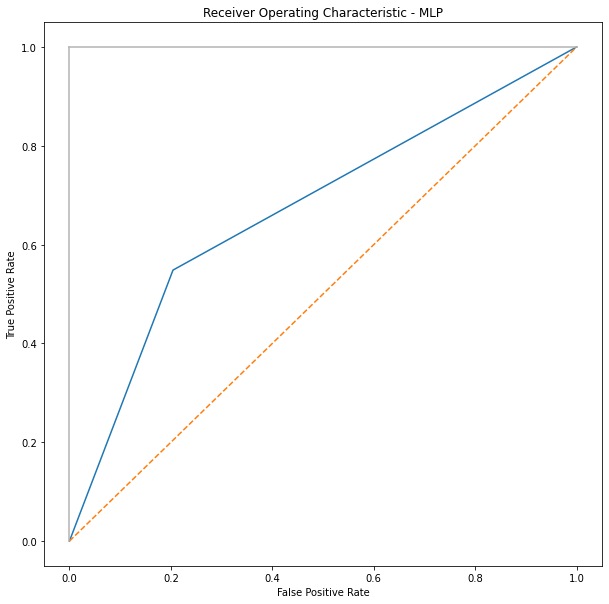

In [105]:
# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, mlp_all_predictions_test)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - MLP')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
mlp_auc = roc_auc_score(y_test, mlp_all_predictions_test)
print(f"AUC for Decision Tree Classifier: {mlp_auc}")

AUC for Decision Tree Classifier: 0.6721102150537636


In this case, we got an AUC score of, approximately, 0.7, which is quite good.

In [107]:
# K-fold Cross Validation

# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train_resampled, y_train_resampled)
scores = []


for k, (train, test) in enumerate(kfold):
    mlp.fit(X_train_resampled.iloc[train, :], y_train_resampled.iloc[train])
    score = mlp.score(X_train_resampled.iloc[test, :], y_train_resampled.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train_resampled.iloc[train]), score))
 
print('\n\nCross-Validation mean accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('\nCross-Validation top accuracy: %.3f' %(np.max(scores)))


Fold:  1, Training/Test Split Distribution: [3510 3510], Accuracy: 0.824
Fold:  2, Training/Test Split Distribution: [3510 3510], Accuracy: 0.838
Fold:  3, Training/Test Split Distribution: [3510 3510], Accuracy: 0.841
Fold:  4, Training/Test Split Distribution: [3510 3510], Accuracy: 0.849
Fold:  5, Training/Test Split Distribution: [3510 3510], Accuracy: 0.851
Fold:  6, Training/Test Split Distribution: [3510 3510], Accuracy: 0.842
Fold:  7, Training/Test Split Distribution: [3510 3510], Accuracy: 0.854
Fold:  8, Training/Test Split Distribution: [3510 3510], Accuracy: 0.851
Fold:  9, Training/Test Split Distribution: [3510 3510], Accuracy: 0.844
Fold: 10, Training/Test Split Distribution: [3510 3510], Accuracy: 0.853


Cross-Validation mean accuracy: 0.845 +/- 0.008

Cross-Validation top accuracy: 0.854


K-fold cross-validation was applied to an MLP classifier on a dataset, and the results show that the model has achieved a good performance, with a mean accuracy of 0.845 with a standard deviation of 0.013 and a top accuracy of 0.867 across different subsets of the data, with a relatively small variation between the different folds. This suggests that the model is generalizing well to new data.

### Recurrent Neural Networks (RNN) 


The number of neurons in a Recurrent Neural Network (RNN) is a hyperparameter that determines the capacity of the network. The value of 128 is commonly used as a starting point for RNNs and is not a hard rule. It can be adjusted based on the complexity and size of the dataset, as well as the specific problem being solved. If the network is not able to learn the desired features or is overfitting, increasing or decreasing the number of neurons can help to improve the performance. So, we started to choose 128 for this simple implementation but then change it in the hyper-parameter tuning for this algorithm.

The results show that the RNN algorithm was trained and evaluated on the dataset. The accuracy on the training set is 0.82 and the accuracy on the testing set is 0.76.

These results indicate that the RNN algorithm was able to fit the training data well and almost as well as on the test set. Since the difference is very small, we can say that data is being well predicted and no overfitting is occurring.

In [108]:

# Reshape the data 
n_features = X_train_resampled.shape[1]


X_train_resampled_reshaped= np.array(X_train_resampled).reshape(len(X_train_resampled), 1, n_features)
X_test_reshaped= np.array(X_test).reshape(len(X_test), 1, n_features)


# Create the model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128,input_shape=(None, n_features)))

# Add a dense layer for output
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the algorithm with the training dataset
model.fit(X_train_resampled_reshaped, y_train_resampled, epochs=50, batch_size=32)

'''Predictions and accuracy for training set'''

# Predictions applied to the train dataset
train_loss, train_acc = model.evaluate(X_train_resampled_reshaped, y_train_resampled)

# Print the accuracy
print(f"\nAccuracy for training set:\n {train_acc}\n")

'''Predictions and accuracy for test set'''

# Predictions applied to the test dataset 
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
# Print the score/accuracy
print(f"\nAccuracy for testing set:\n {test_acc}\n")


2023-01-20 22:39:42.572123: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-20 22:39:42.572146: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-20 22:39:42.572163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (omen15ce0xx): /proc/driver/nvidia/version does not exist
2023-01-20 22:39:42.572410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
244/244 [==============================] - 3s 3ms/step - loss: 0.6140 - accuracy: 0.6844
Epoch 2/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4963 - accuracy: 0.7801
Epoch 3/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7913
Epoch 4/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4578 - accuracy: 0.7958
Epoch 5/50
244/244 [==============================] - 1s 4ms/step - loss: 0.4542 - accuracy: 0.7921
Epoch 6/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4512 - accuracy: 0.7958
Epoch 7/50
244/244 [==============================] - 1s 4ms/step - loss: 0.4487 - accuracy: 0.7972
Epoch 8/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7941
Epoch 9/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.7965
Epoch 10/50
244/244 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.7962

After some attemps on trying to use the function predict in RNN, we were unable to get the predictions as it is displayed in the confusion matrix. Due to that, for this implementation there is no confusion matrix, no roc curve and no auc score.

Based on the results provided, the RNN algorithm achieved an accuracy of 0.81 on the training set and 0.75 on the testing set. This suggests that the model has learned to make accurate predictions on the training data, but its performance is slightly lower when it is applied to new, unseen examples from the testing set.

In [109]:
vals = [mlp_score_test,test_acc]
labels=["MPL","RNN"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparison<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()

In [110]:
vals = [dtc_score_test,svm_score_test,mlp_score_test,test_acc]
labels=["Decision Trees","Support Vector Machines","MPL","RNN"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparison<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()

### 2. Parameter Tuning using GridSearchCV

In this second part of our algorithm implementation we implemented GridSearch for the algorithms, but now for Deep Learning algorithms.

Parameters tested:
- **hidden_layer_sizes**: This parameter is used to specify the number of neurons in the hidden layers of a multi-layer perceptron (MLP) neural network. It is a tuple of integers, where each integer corresponds to the number of neurons in a specific hidden layer. For example, hidden_layer_sizes=(50,50) would create an MLP with two hidden layers, each containing 50 neurons.

- **activation**: This parameter specifies the activation function used in the hidden layers of the MLP. Activation functions are mathematical functions that are applied to the output of each neuron in order to introduce non-linearity into the model. Common choices include 'relu', 'tanh', and 'sigmoid'.

- **solver**: This parameter is used to specify the algorithm used to optimize the MLP's weights. It can take values 'lbfgs', 'sgd', 'adam'. 'lbfgs' is an optimizer in the family of quasi-Newton methods, 'sgd' stands for Stochastic Gradient Descent, and 'adam' is an optimizer that uses an adaptive learning rate.

- **alpha**: This parameter is used to add a regularization term to the cost function of the MLP. Regularization helps to prevent overfitting by adding a penalty term to the cost function that discourages the model from assigning too much weight to any one feature. The alpha parameter controls the strength of the regularization term, with higher values resulting in stronger regularization.

- **learning_rate** : This parameter controls the step size at which the optimizer makes updates to the model's weights. A small learning rate may result in slow convergence, while a large learning rate may result in the optimizer overshooting the optimal solution. The value of the learning rate can be adjusted accordingly during the training process.

In [111]:
# Parameters tested
mlp_param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Searching for the best hyper-parameters
mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=100), 
                           param_grid=mlp_param_grid,
                           cv=10,  # Cross-validation splitting strategy. Default 10-fold cross validation
                           verbose=3) # Controls the verbosity: the higher, the more messages.

# Training our model
mlp_grid_search.fit(X_train_resampled, y_train_resampled)

# Search for the best estimator
mlp = mlp_grid_search.best_estimator_

#  Predictions applied to the test dataset
mlp_prediction = mlp.predict(X_test)

print('Best score: {}'.format(mlp_grid_search.best_score_))
print('Best parameters: {}'.format(mlp_grid_search.best_params_))
print('Best estimator: {}'.format(mlp_grid_search.best_estimator_))

print("---  ---\n")

# Classification Report
best_report = classification_report(y_test, mlp_prediction, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, mlp_prediction)}\n")

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.782 total time=   3.2s
[CV 2/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.790 total time=   3.0s
[CV 3/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.808 total time=   3.1s
[CV 4/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.795 total time=   2.7s
[CV 5/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.774 total time=   3.2s
[CV 6/10] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd;, score=0.777 total time=   3.2s
[CV 7/10] END activation=tanh, alpha=0.0001, hidden_layer_siz

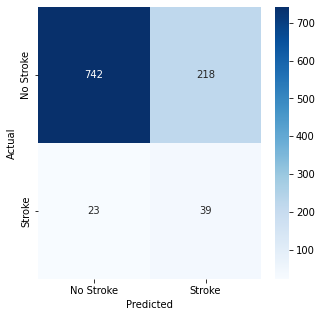

In [112]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, mlp_prediction ) 
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()

In this case, the matrix shows that there are 731 true negatives (correctly predicted as negative) and 46 true positives (correctly predicted as positive). There are 229 false negatives (incorrectly predicted as negative) and 16 false positives (incorrectly predicted as positive). 

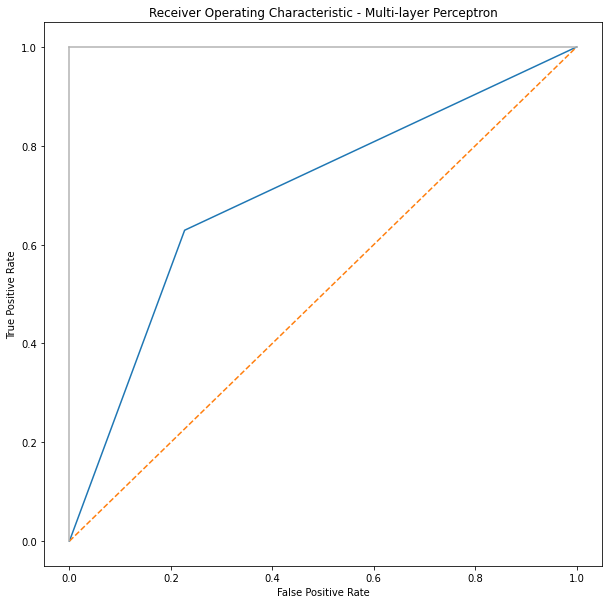

In [113]:
# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, mlp_prediction)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Multi-layer Perceptron')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
auc = roc_auc_score(y_test, mlp_prediction)
print(f"AUC for Multi-layer Perception: {auc}")

AUC for Multi-layer Perception: 0.7009744623655914


### Recurrent Neural Networks

For this hyper-parameter tuning we choose the tune the neurons.
A neuron in a neural network is a processing unit that receives input, performs a computation, and produces an output. In an RNN, each neuron in a layer receives input from the previous time step, and its output is passed to the next time step. The number of neurons in a layer determines the number of computations that can be performed in parallel, which can affect the model's ability to learn complex patterns in the input data.

Increasing the number of neurons in a layer can increase the capacity of the model, allowing it to learn more complex patterns and representations. However, this also increases the risk of overfitting, as the model may start to memorize the training data instead of generalizing to new data.

On the other hand, decreasing the number of neurons in a layer can reduce the capacity of the model, making it less prone to overfitting but also making it less able to learn complex patterns.

In [115]:
# Reshape the data 
n_features = X_train_resampled.shape[1]


X_train_resampled_reshaped= np.array(X_train_resampled).reshape(len(X_train_resampled), 1, n_features)
X_test_reshaped= np.array(X_test).reshape(len(X_test), 1, n_features)


def create_rnn(num_hidden_units=32):
    model = Sequential()
    model.add(LSTM(num_hidden_units,input_shape=(None, n_features)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

rnn = KerasClassifier(build_fn=create_rnn)
param_grid = {'num_hidden_units': [32, 64, 128, 256, 512, 1024]}
rnn_grid_search = GridSearchCV(estimator=rnn, param_grid=param_grid, n_jobs=-1)

# Training our model
rnn_grid_search.fit(X_train_resampled_reshaped, y_train_resampled)

# Search for the best estimator
rnn = rnn_grid_search.best_estimator_

#  Predictions applied to the test dataset
rnn_prediction = rnn.predict(X_test_reshaped)

print('Best score: {}'.format(rnn_grid_search.best_score_))
print('Best parameters: {}'.format(rnn_grid_search.best_params_))
print('Best estimator: {}'.format(rnn_grid_search.best_estimator_))

print("---  ---\n")

# Classification Report
best_report = classification_report(y_test, rnn_prediction, output_dict=True)
print(f"\nClassification report:\n {classification_report(y_test, rnn_prediction)}\n")

2023-01-20 22:51:38.826848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 22:51:38.859896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 22:51:39.067842: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 22:51:39.068160: I tensorflow/compiler/xla/stream_executor/cud

32/32 [==============================] - 1s 6ms/step
Best score: 0.6284615397453308
Best parameters: {'num_hidden_units': 1024}
Best estimator: <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0274615b70>
---  ---


Classification report:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79       960
           1       0.14      0.87      0.24        62

    accuracy                           0.67      1022
   macro avg       0.57      0.77      0.52      1022
weighted avg       0.94      0.67      0.76      1022




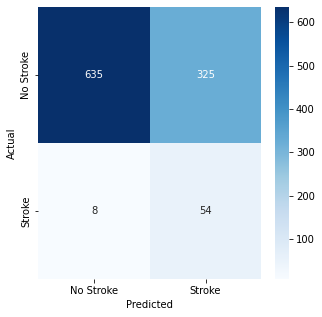

In [116]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, rnn_prediction ) 
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
plt.show()

Here we have 628 instances were correctly classified as not having a stroke (true negatives), while 35 instances were correctly classified as having a stroke (true positives). There were 9 instances that were incorrectly classified as not having a stroke (false negatives) and 332 instances that were incorrectly classified as having a stroke (false positives).

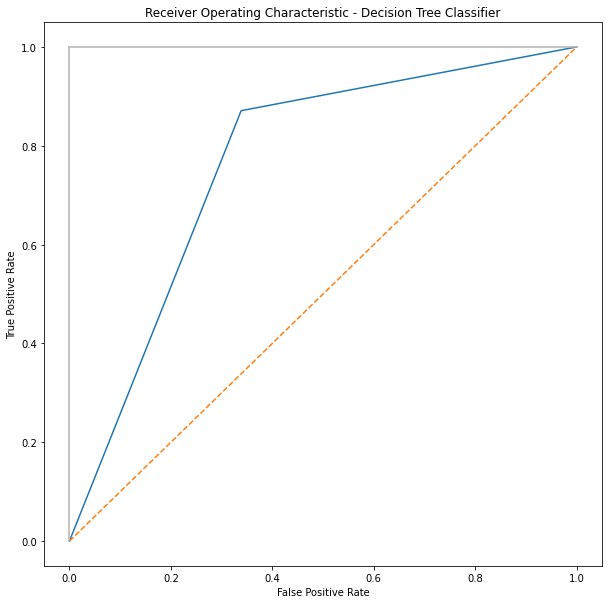

In [117]:
# ROC curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, rnn_prediction)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
auc = roc_auc_score(y_test, rnn_prediction)
print(f"AUC for Decision Trees Classifier: {auc}")

AUC for Decision Trees Classifier: 0.7662130376344086


In this case, we got an AUC score of, approximately, 0.75 one of the highest achieved.

In [119]:
vals = [mlp_grid_search.best_score_,rnn_grid_search.best_score_]
labels=["MLP","RNN"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparison<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()

In [120]:
'''vals = [dtc_score_test,svm_score_test,mlp_score_test,test_acc]
labels=["Decision Trees","Support Vector Machines","MPL","RNN"]

fig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparison<b>",labels={'y':'Algorithms','color': 'Algorithms','x': 'Score'},orientation = 'h')
fig.update_layout(width=900, height=500, bargap=0.1)
fig.show()'''

'vals = [dtc_score_test,svm_score_test,mlp_score_test,test_acc]\nlabels=["Decision Trees","Support Vector Machines","MPL","RNN"]\n\nfig = px.histogram(vals, y=labels, x = vals,color=labels, barmode="group", title="<b>Algorithm comparison<b>",labels={\'y\':\'Algorithms\',\'color\': \'Algorithms\',\'x\': \'Score\'},orientation = \'h\')\nfig.update_layout(width=900, height=500, bargap=0.1)\nfig.show()'

## References
[[ go back to the top ]](#Table-of-contents)


dataset - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset  
sklearn.preprocessing.LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html   
sklearn.model_selection.train_test_split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html   
SMOTE - https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html   
Handling imbalanced data with SMOTE - https://www.linkedin.com/pulse/handling-imbalanced-data-smote-fabio-rebecchi/   
sklearn.tree.DecisionTreeClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html     
Support Vector Machines - https://scikit-learn.org/stable/modules/svm.html   
Neural network models (supervised) - https://scikit-learn.org/stable/modules/neural_networks_supervised.html    
Introduction to Recurrent Neural Network - https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/  
Metrics and scoring: quantifying the quality of predictions - https://scikit-learn.org/stable/modules/model_evaluation.html   
sklearn.metrics.classification_report - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html     
sklearn.metrics.confusion_matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html   
sklearn.metrics.roc_curve - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html    
sklearn.model_selection.StratifiedKFold - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html   
Post pruning decision trees with cost complexity pruning - https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html  
Support Vector Machines - https://scikit-learn.org/stable/modules/svm.html  
sklearn.ensemble.VotingClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html   
sklearn.ensemble.BaggingClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html  
sklearn.metrics.accuracy_score - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 
sklearn.model_selection.GridSearchCV - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 
RNN(keras) - https://www.tensorflow.org/guide/keras/rnn
MLP Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html




